# Data Viz - Final Project

## Set Up

In [ ]:
# Step 0: libraries!

import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import (cluster,
                     datasets,
                     decomposition,
                     discriminant_analysis,
                     dummy,
                     ensemble,
                     feature_selection as ftr_sel,
                     linear_model,
                     metrics,
                     model_selection as skms,
                     multiclass as skmulti,
                     naive_bayes,
                     neighbors,
                     pipeline,
                     preprocessing as skpre,
                     svm,
                     tree)
#Bulk imported all models for now

In [ ]:
# Step 0.1: Access Google Drive.

# import requisite library
from google.colab import drive

# login and verity that you want to use it
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 0.2: Move us to the "Data" folder

# identify the root directory
root_dir = "/content/drive/My Drive/"

# identify the location of the cleaned data folder
data_folder = root_dir + "Data - Human Centered DS/Cleaned Data/"

# change directory to the data folder
os.chdir(data_folder)

In [ ]:
# Step 0.3: Import our cleaned CSVs

# Set up some dictionaries to store our data
Q1_dic = {'folder':'Question_1'}
Q2_dic = {'folder':'Question_2'}
Q3_dic = {'folder':'Question_3'}
Q4_dic = {'folder':'Question_4'}
all_Q_dic = [Q1_dic, Q2_dic, Q3_dic, Q4_dic]

# iterate through cleaned data subfolders
for Q in all_Q_dic:
  sub_folder = data_folder + Q['folder']
  # print(sub_folder)

  # now iterate through the files in the folder
  for root, direc, files in os.walk(sub_folder):
    for file in files:
      # get our file location
      file_path = os.path.join(root, file)

      # split the file into its name and extension
      filename, extension = os.path.splitext(file)

      # read our file to df and store in the current dic
      Q[filename] = pd.read_csv(file_path)

      # print the key for future reference
      print(Q['folder'],filename)

Question_1 Police_full
Question_1 Police_Stations
Question_1 Random
Question_2 Random
Question_2 Citizen_Admin
Question_3 Random_Heterogeninty
Question_3 User_Survery
Question_3 Citizen
Question_4 Admin
Question_4 CCTVwFemaleStaff
Question_4 Random


## Question 1

### Exploration/Prototyping

In [ ]:
# grab our dataset
polstat = Q1_dic['Police_Stations']

polstat.head()

,uid,gender,e_wcase,e_effective,e_false_case,e_helpful,e_add_officer,e_add_female,e_female_better,e_taken_seriously,...,b_total_sampled,b_female_sampled,b_male_sampled,b_total_surveyed,b_female_surveyed,b_male_surveyed,e_male_weight,b_male_weight,e_female_weight,b_female_weight
0,2240137,male,too much attention,very effective,common,very helpful,more effective,Less effective,female,disagree,...,12,1,11,10,0,10,3.818182,3.272727,6.0,3.0
1,2240133,male,too much attention,very effective,common,very helpful,much more effective,No difference,female,strongly agree,...,12,1,11,10,0,10,3.818182,3.272727,6.0,3.0
2,2240136,male,too much attention,very effective,uncommon,very helpful,much more effective,Less effective,female,disagree,...,12,1,11,10,0,10,3.818182,3.272727,6.0,3.0
3,2240132,female,too much attention,very effective,common,helpful,much more effective,Less effective,female,agree,...,12,1,11,10,0,10,3.818182,3.272727,6.0,3.0
4,2240134,male,too much attention,very effective,very common,very helpful,much more effective,No difference,female,agree,...,12,1,11,10,0,10,3.818182,3.272727,6.0,3.0


We're going to try to visualize any differences between how women officers and men officers responded to the police survey at baseline.

In [ ]:
# select just our survey questions + gender
survey = polstat[['gender',
                  'b_wcase',
                  'b_effective',
                  'b_pol_impt',
                  'b_thana_impt',
                  'b_sensitivity',
                  'b_helpful',
                  'b_female_better',
                  'b_add_officer',
                  'b_add_female']]
survey.head()

,gender,b_wcase,b_effective,b_pol_impt,b_thana_impt,b_sensitivity,b_helpful,b_female_better,b_add_officer,b_add_female
0,male,2.7,4.5,0.5,0.4,7.3,4.2,2.7,4.5,4.6
1,male,2.7,4.5,0.5,0.4,7.3,4.2,2.7,4.5,4.6
2,male,2.7,4.5,0.5,0.4,7.3,4.2,2.7,4.5,4.6
3,female,2.7,4.5,0.5,0.4,7.3,4.2,2.7,4.5,4.6
4,male,2.7,4.5,0.5,0.4,7.3,4.2,2.7,4.5,4.6


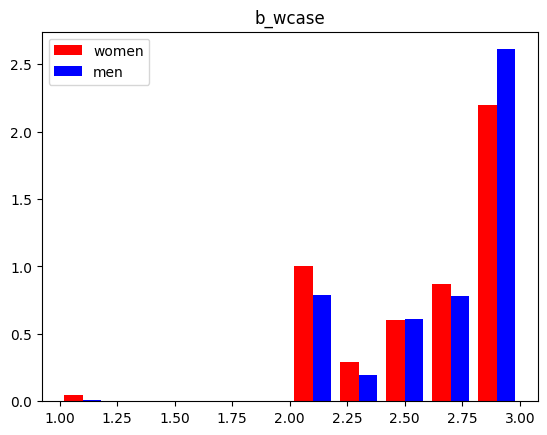

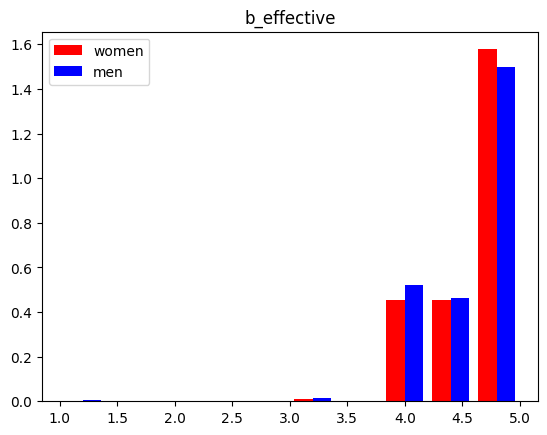

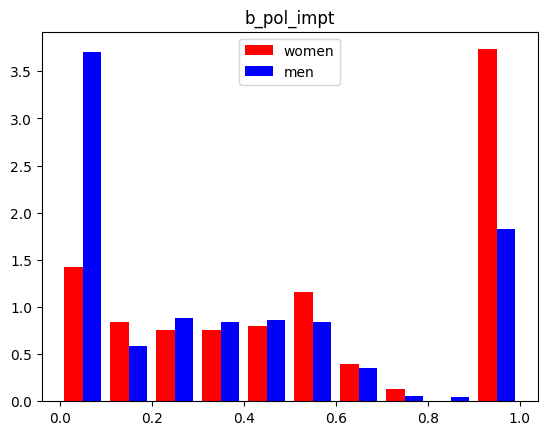

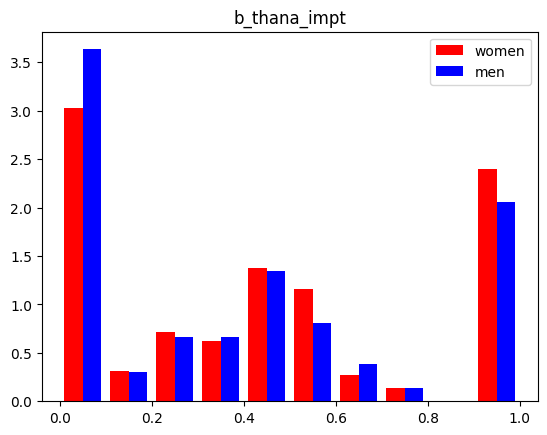

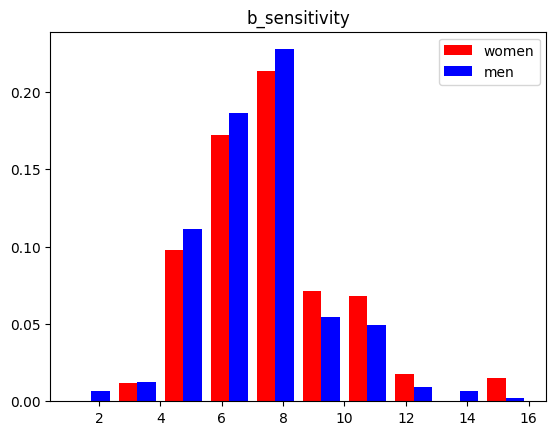

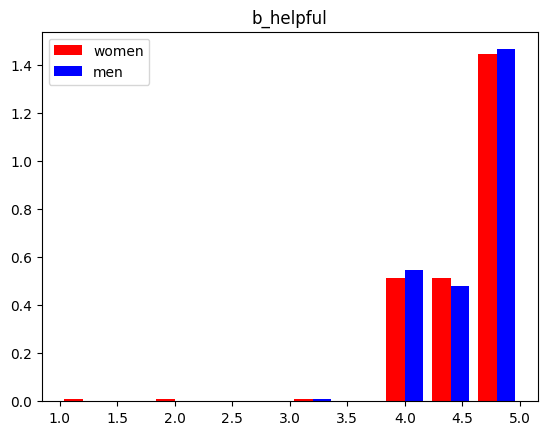

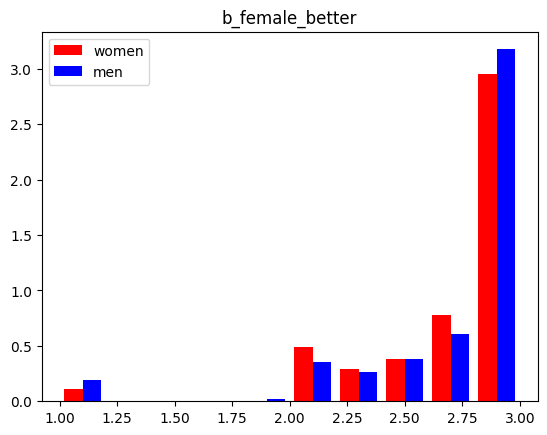

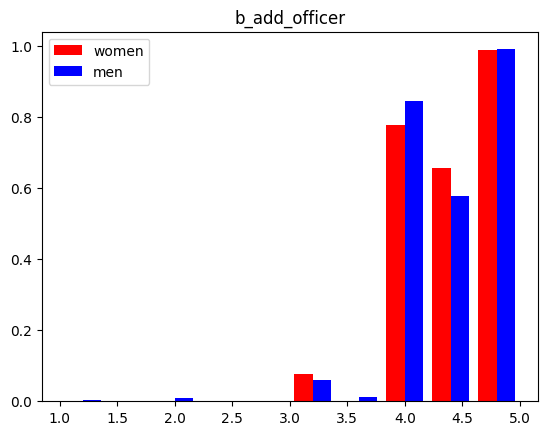

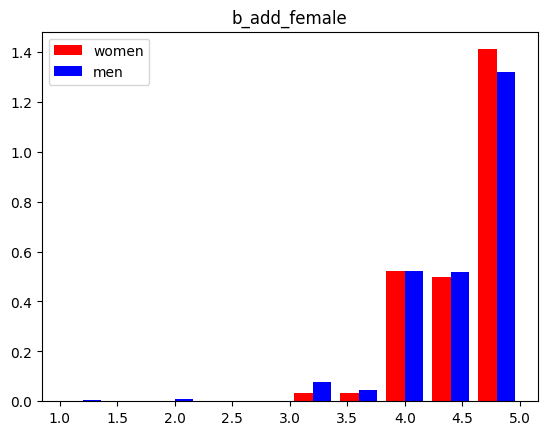

In [ ]:
# split into male and female sets
survey_f = survey[survey['gender'] == 'female']
survey_m = survey[survey['gender'] == 'male']

# we'll need a list of our question column names
survey_qs = ['b_wcase',
             'b_effective',
             'b_pol_impt',
             'b_thana_impt',
             'b_sensitivity',
             'b_helpful',
             'b_female_better',
             'b_add_officer',
             'b_add_female']

# iterate through each question to make a histograph comparing men and women's responses
for q in survey_qs:
  data = [survey_f[q],survey_m[q]]
  fig, ax = plt.subplots()
  _  = ax.hist(data, density=True, histtype='bar', color=['red','blue'], label=['women','men'])
  _ = ax.legend(prop={'size': 10})
  _ = ax.set_title(q)

_ = plt.show()


Oh, I would love to have more information on how b_pol_impt and b_thana_impt are calculated - these are some very interesting spreads with the largest gender differentials at the extremes.

Here is the corresponding section of the survey:
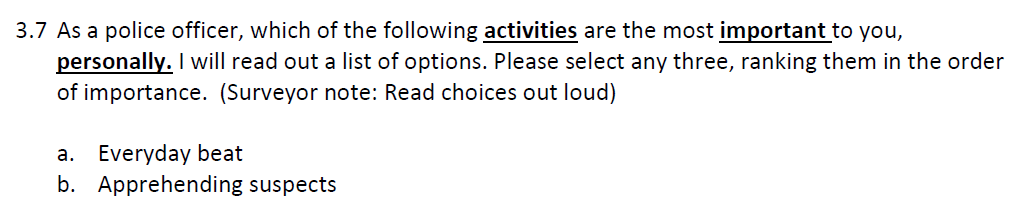
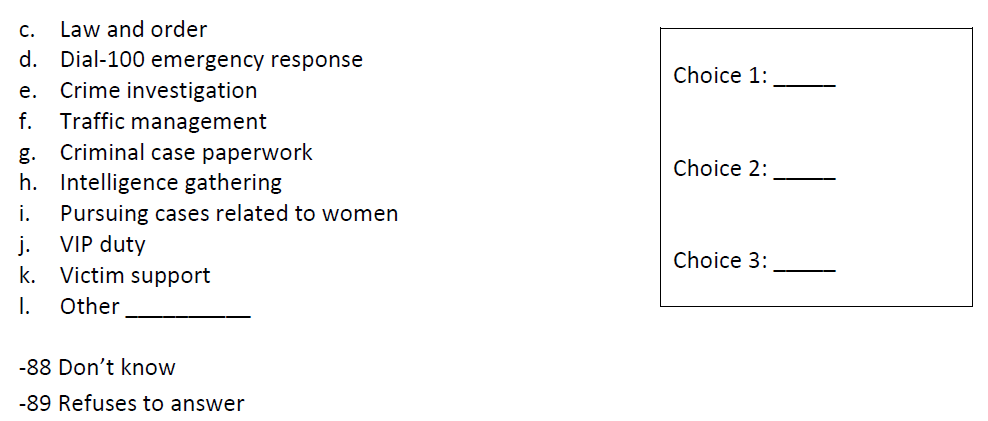
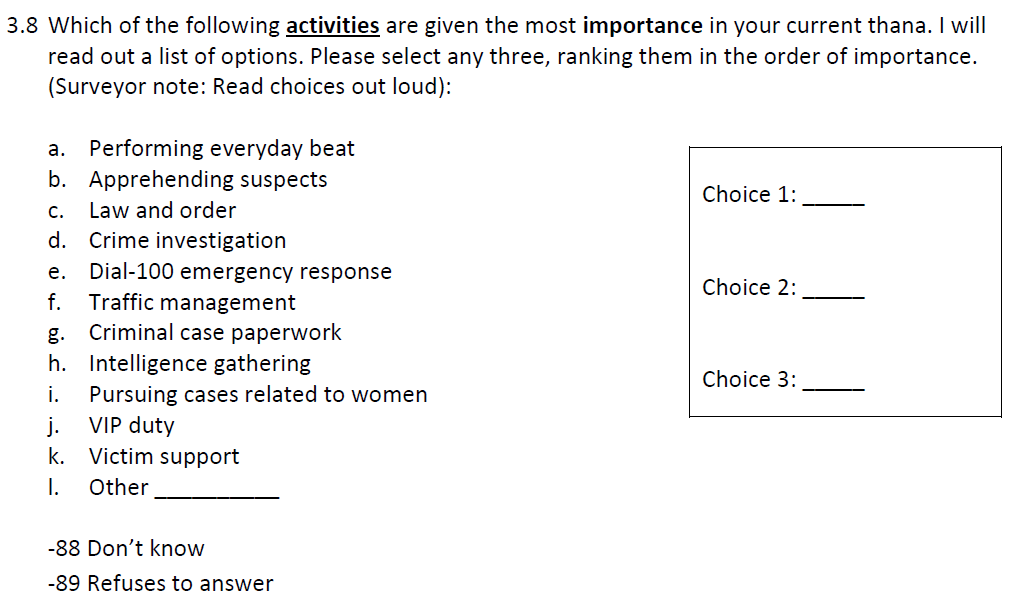


It is not the most clear to me how these are indexed into a 0 to 1 scale. Is it an index of whether the police officer selected tasks relevant to crimes against women?

Regardless, let's experiment with those two graphs.

### Polished Visualization

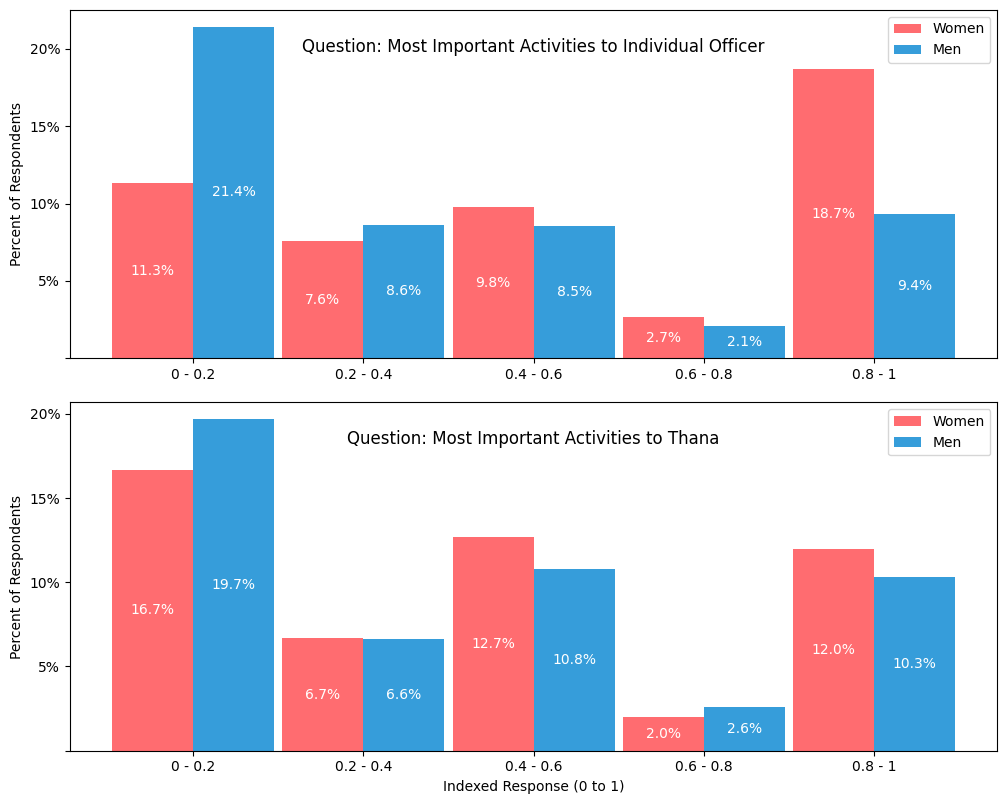

In [ ]:
# pick our two questions
impts = ['b_pol_impt', 'b_thana_impt']

# make two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
fig.tight_layout()
n = 5
colors = ['xkcd:light red','xkcd:cerulean']
gends = ['Women','Men']

# plot pol_impt
data1 = [survey_f['b_pol_impt'],survey_m['b_pol_impt']]
values, bins, bars = ax1.hist(data1, n, density=True,  histtype='bar', rwidth=0.95, color=colors, alpha=0.8, label=gends)
_ = ax1.legend(prop={'size': 10})
_ = ax1.set_title('Question: Most Important Activities to Individual Officer', y=1.0, pad=-30)
# _ = ax1.set_xlabel('Indexed Response (0 to 1)')
_ = ax1.set_ylabel('Percent of Respondents')

# Adding data labels
for b in bars:
  for bar in b:
      yval = bar.get_height()
      ax1.text(
          bar.get_x() + bar.get_width() / 2, yval / 2,  # Center text vertically within the bar
          f'{yval * 10:.1f}%', ha='center', va='center', color='white', fontsize=10
      )

# make axes more user-friendly
_ = ax1.set_yticks([0,0.5,1,1.5,2])
_ = ax1.set_yticklabels(['','5%','10%','15%','20%'])
_ = ax1.set_xticks([0.1,0.3,0.5,0.7,0.9])
_ = ax1.set_xticklabels(['0 - 0.2','0.2 - 0.4','0.4 - 0.6','0.6 - 0.8','0.8 - 1'])

# plot thana_impt
data2 = [survey_f['b_thana_impt'],survey_m['b_thana_impt']]
values2, bins2, bars2 = ax2.hist(data2, n, density=True, histtype='bar', rwidth=0.95, color=colors, alpha=0.8, label=gends)
_ = ax2.legend(prop={'size': 10})
_ = ax2.set_title('Question: Most Important Activities to Thana', y=1.0, pad=-30)
_ = ax2.set_xlabel('Indexed Response (0 to 1)')
_ = ax2.set_ylabel('Percent of Respondents')

# Adding data labels
for b in bars2:
  for bar in b:
      yval = bar.get_height()
      ax2.text(
          bar.get_x() + bar.get_width() / 2, yval / 2,  # Center text vertically within the bar
          f'{yval * 10:.1f}%', ha='center', va='center', color='white', fontsize=10
          )

# make axes more user-friendly
_ = ax2.set_yticks([0,0.5,1,1.5,2])
_ = ax2.set_yticklabels(['','5%','10%','15%','20%'])
_ = ax2.set_xticks([0.1,0.3,0.5,0.7,0.9])
_ = ax2.set_xticklabels(['0 - 0.2','0.2 - 0.4','0.4 - 0.6','0.6 - 0.8','0.8 - 1'])

# plt.savefig(f'/content/drive/MyDrive/Data - Human Centered DS/Plots/thana_pol_impt.png', bbox_inches='tight', dpi=400)
_ = plt.show()

These two histograms illustrate the disribution of men and women police officers' baseline opinions about the most important activities to them as police officers, and to their Thana as a whole. Both questions provided a list of tasks and allowed respondents to rank their top three activities; the scores were then indexed on a scale of 0 (least concerned with crimes against women) and 1 (most concerned).

What makes these questions interesting is the strong gender difference in responses. Looking at tasks for the police officer, nearly twice as many men as women officers (21.4% vs. 11.3%) indexed in the bottom quintile, while the ratio is flipped for the top quintile (9.4% men vs. 18.7% women). It would seem, on the individual level, women officers are much more concerned with crimes against and services for women in their communities than their male coworkers.

The same trend is present, but much smaller, looking at tasks for the Thana as a whole: 3% more men than women indexed in the bottom quintile, while only 1.7% more women indexed in the top quintile. It seems that men and women officers are in close agreement about what the current priorities are at their station, with slightly more respondents in the lower quintiles than the upper quintiles.

### Sidebar: Revisiting Old Models

Let's try something wild. Let's revisit the logistic regression trying to identify gender and/or the linear regression trying to match percent of women in a station - but only take these two questions.

In [ ]:
# First up: Logistic Regression

# extract our columns to analyze from Police_Stations, same as before
polstat = Q1_dic['Police_Stations']

# drop any duplicated data points
polstat = polstat.drop_duplicates()

X = polstat[['urban',
             'population',
             'b_pol_impt',
             'b_thana_impt']]

# convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# we are predicting gender here: 0 for men, 1 for women

Y = polstat.copy()
Y['gender'] = Y['gender'].apply(lambda x: 1 if x in ['female'] else 0)
y = Y['gender']

# check our work
y.value_counts()

,count
gender,
0,1679
1,225


In [ ]:
# make a model!

#Set scaler
scaler = skpre.MinMaxScaler()

# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# initiate a logistic model
model = linear_model.LogisticRegression(class_weight='balanced')

# feed our data through a scaler -> model pipeline
pipe = pipeline.make_pipeline(scaler, model)
pipe.fit(X_train, y_train) #fit_transforms for standardization before fitting model
y_preds = pipe.predict(X_test)

# hold our breath and check accuracy and F1
accuracy = metrics.accuracy_score(y_test, y_preds)
f1 = metrics.f1_score(y_test, y_preds)
print(f'Accuracy = {accuracy}, F1 = {f1}')

Accuracy = 0.6876640419947506, F1 = 0.2787878787878788


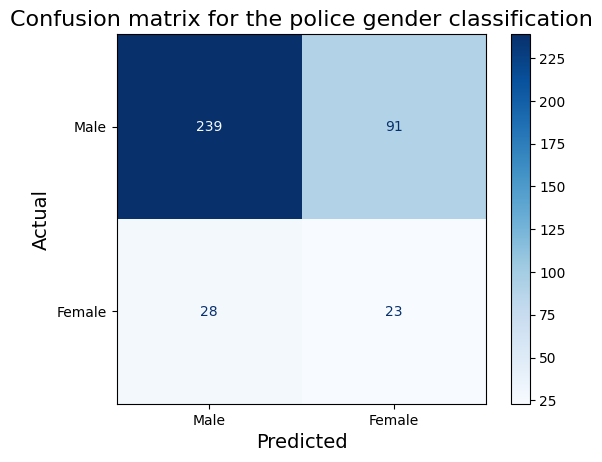

In [ ]:
# call confusion matrix using species test data and the predictions
confusionMatrix = metrics.confusion_matrix(y_test, y_preds)

# bring back the species names
names = ['Male', 'Female']
_ = cmplot = metrics.ConfusionMatrixDisplay(confusionMatrix,
                                    display_labels=names)

# changing the color map to blues
_ = cmplot.plot(cmap=plt.get_cmap('Blues'))

# make some titles
_ = plt.title("Confusion matrix for the police gender classification", fontsize=16)
_ = plt.xlabel("Predicted", fontsize=14)
_ = plt.ylabel("Actual", fontsize=14)

_ = plt.show()

Okay, so not much luck on the logistic regression...

Let's try the linear regression again.

In [ ]:
# extract our columns to analyze from Police_Stations
polstat = Q1_dic['Police_Stations']

# drop any duplicated data points
polstat = polstat.drop_duplicates()

X = polstat[['gender',
             'urban',
             'population',
             'b_pol_impt',
             'b_thana_impt']]

# convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# our predicted value is the fraction of women to all staff at a given station
# we'll calculate that from the fields b_female_staff and b_total_staff

Y = polstat.copy()
Y['fraction'] = Y['b_female_staff']/Y['b_total_staff']
y = Y['fraction'] # make a convenient shorthand

In [ ]:
def rms_error(actual, predicted):
    ' root-mean-squared-error function '
    # lesser values are better (a<b ... a better)
    mse = metrics.mean_squared_error(actual, predicted)
    return np.sqrt(mse)
rms_scorer = metrics.make_scorer(rms_error)

In [ ]:
# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# initiate a model
model = linear_model.LinearRegression()

# create a pipeline to standardize & fit
pipe = pipeline.make_pipeline(scaler, model)
pipe.fit(X_train, y_train) #fit_transforms for standardization before fitting model

# predict our outputs
y_preds = pipe.predict(X_test)

r2 = metrics.r2_score(y_test, y_preds)
rmse = rms_error(y_test, y_preds)

print(f'R-squared = {r2}, RMSE = {rmse}')

R-squared = 0.01425969631356605, RMSE = 0.03830464521231721


Wow that's...worse than before. Oh well, it was worth a try.

## Question 2


### Exploration/Prototyping

In [ ]:
# extract our dependent variables from Citizen_Admin
citizen = Q2_dic['Citizen_Admin']

# drop any duplicated data points
citizen = citizen.drop_duplicates()

X = citizen[['treatment',
             'urban',
             'population',
             # 'training_score',
             ]]

# we want to look at the difference between the baseline and endline dial100 counts
X['dial100'] = citizen['e_dial100_count'] - citizen['b_dial100_count']

# convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# just to be safe: drop dupes again
X = X.drop_duplicates()

# our independent variable is treatment (1) or control (0)
y = X['treatment_Treatment']
# y = y['treatment'].apply(lambda x: 1 if x in ['Treatment'] else 0)

# drop treatment data from X
Xx = X.drop(['treatment_Treatment'],axis=1)

# check our work
y.value_counts()

<ipython-input-16-cad441cb8eae>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dial100'] = citizen['e_dial100_count'] - citizen['b_dial100_count']


,count
treatment_Treatment,
True,1094
False,554


In [ ]:
# make a model!

# split train and test
X_train, X_test, y_train, y_test = train_test_split(Xx, y, test_size=0.2, random_state=2)

# initiate a logistic model
model = linear_model.LogisticRegression(class_weight='balanced')

# feed our data through a scaler -> model pipeline
pipe = pipeline.make_pipeline(scaler, model)
pipe.fit(X_train, y_train) #fit_transforms for standardization before fitting model
y_preds = pipe.predict(X_test)

In [ ]:
# hold our breath and check accuracy and F1
accuracy = metrics.accuracy_score(y_test, y_preds)
f1 = metrics.f1_score(y_test, y_preds)
print(f'Accuracy = {accuracy}, F1 = {f1}')

Accuracy = 0.509090909090909, F1 = 0.5524861878453039


In [ ]:
coefficients = model.coef_
intercept = model.intercept_
equation = "target = {:.2f}".format(intercept[0])
for i, feature in enumerate(Xx.columns):
    equation += " + {:.2f} * {}".format(coefficients[0][i], feature)

print(equation)

target = 0.71 + -0.63 * population + -0.96 * dial100 + 0.25 * urban_Urban


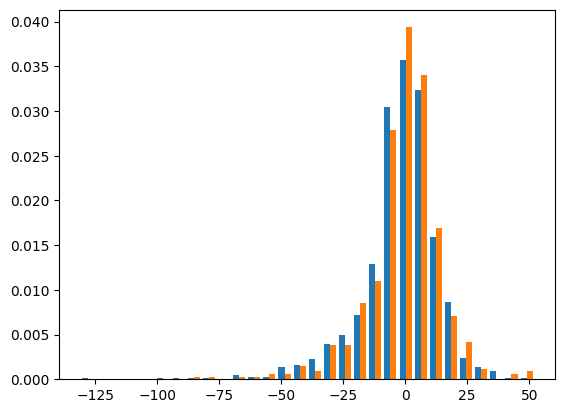

In [ ]:
# let's actually look at the histograms of dial100 calls
fig, ax = plt.subplots()
n = 30

# split our data into treatment vs. control sets
X_t = X[X['treatment_Treatment'] == True]
X_c = X[X['treatment_Treatment'] == False]
data_X = [X_t['dial100'],X_c['dial100']]

_ = ax.hist(data_X,n,density=True, histtype='bar')

plt.show()

Interesting, but not the most enlightening. The distribution is interesting, in that it looks like a similar number of thanas increased vs. decreased their call volume.

### Polished Visualization(s)

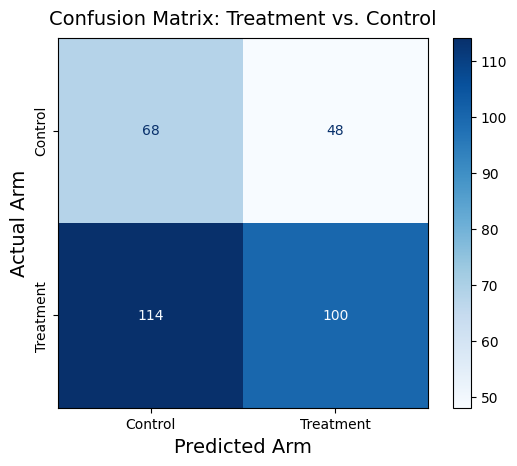

In [ ]:
# call confusion matrix using test data and the predictions
confusionMatrix = metrics.confusion_matrix(y_test, y_preds)

# group names
names = ['Control', 'Treatment']
_ = cmplot = metrics.ConfusionMatrixDisplay(confusionMatrix, display_labels=names)

# changing the color map to blues
_ = cmplot.plot(cmap=plt.get_cmap('Blues'))

# make some titles
_ = plt.title("Confusion Matrix: Treatment vs. Control", fontsize=14, y=1.0, pad=10)
_ = plt.xlabel("Predicted Arm", fontsize=14)
_ = plt.ylabel("Actual Arm", fontsize=14)
_ = plt.yticks(rotation=90, va='center')

_ = plt.show()

This is a nice and clear demonstration of the accuracy and recall of the model, but I am interested in comparing this to another method of displaying categorization data, roughtly based on the idea of a class prediction error bar graph (see https://www.scikit-yb.org/en/latest/api/classifier/class_prediction_error.html)

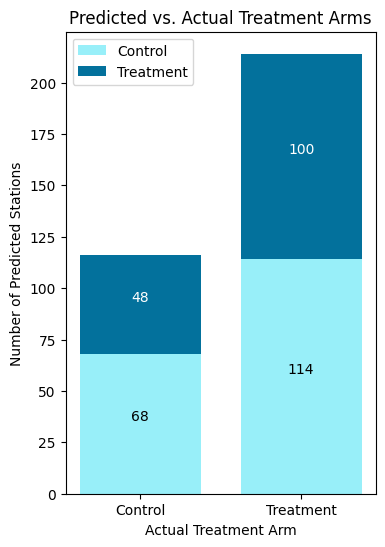

In [ ]:
# arrange our data properly
# print(confusionMatrix)
arm_labs = ['Control','Treatment']
arm_vals = {
    'Control': [[confusionMatrix[0,0],confusionMatrix[1,0]],"xkcd:robin's egg blue"],
    'Treatment': [[confusionMatrix[0,1],confusionMatrix[1,1]],'xkcd:ocean blue']
}

# set up our figure
fig, ax = plt.subplots(figsize=(4,6))
bottom = np.zeros(2)
width = 0.75

for lab, arm in arm_vals.items():
    p = ax.bar(arm_labs, arm[0], width, label=lab, bottom=bottom,color=arm[1])
    for i,bar in enumerate(p):
      c = 'black'
      if bar.get_height() < 10:
        x = 1
      elif bar.get_height() in (48, 100):
        x = 2
        c = 'white'
      else:
        x = 2
      ax.text(
          bar.get_x() + bar.get_width() / 2, (bar.get_height() / x) + bottom[i],  # Center text vertically within the bar
          f'{bar.get_height():.0f}', ha='center', va='bottom', color=c, fontsize=10
      )
    bottom += arm[0]

_ = ax.set_title("Predicted vs. Actual Treatment Arms")
_ = ax.set_xlabel("Actual Treatment Arm")
_ = ax.set_ylabel("Number of Predicted Stations")
ax.legend(loc="upper left")

# plt.savefig(f'/content/drive/MyDrive/Data - Human Centered DS/Plots/confusion_bars.png', bbox_inches='tight', dpi=400)
plt.show()

Personally, for an audience that is less experienced with statistical tools such as confusion matrices, I think the second visualization, the stacked bar chart, is more easy to visually understand and allow the user to better intuit the degrees of accuracy and recall.

This makes sense if we recall that humans are better at parsing information conveyed by location and length than by color or hue. A traditional confusion matrix relies on a color scale to indicate the relative size of the values in each quadrant, while the stacked bar chart encodes this information in length and position, relying on color to distinguish categories rather than degree.

## Question 3

### Data

In [ ]:
for key, value in Q3_dic.items():
  print(key)
  try:
    display(value.head())
    value.info()
  except:
    display(value)

folder


'Question_3'

Random_Heterogeninty


,rand_index,total_assigned_officers,total_fir_2017,population,urban,dist_urban,strat_pca,treatment,group,dist_id,implement_quality,training_score,comm_outreach_strength,regular_whd,women_whd
0,0,47,412,129345,Rural,1,-0.234041,Treatment,women officers,1000,9.000000,2.916667,2.200000,0,1
1,1,29,218,170000,Rural,1,-0.960574,Control,control,1000,7.462185,1.545454,1.798067,0,0
2,2,75,694,102467,Rural,1,1.042663,Control,control,1000,7.462185,1.090909,1.798067,0,0
3,3,40,144,54000,Rural,1,-1.590761,Treatment,regular mhd,1000,7.000000,3.897297,2.030000,1,0
4,4,37,130,76376,Rural,1,-1.570695,Treatment,women officers,1000,9.000000,4.157658,2.200000,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rand_index               180 non-null    int64  
 1   total_assigned_officers  180 non-null    int64  
 2   total_fir_2017           180 non-null    int64  
 3   population               180 non-null    int64  
 4   urban                    180 non-null    object 
 5   dist_urban               180 non-null    int64  
 6   strat_pca                180 non-null    float64
 7   treatment                180 non-null    object 
 8   group                    180 non-null    object 
 9   dist_id                  180 non-null    int64  
 10  implement_quality        180 non-null    float64
 11  training_score           180 non-null    float64
 12  comm_outreach_strength   180 non-null    float64
 13  regular_whd              180 non-null    int64  
 14  women_whd                1

,uid,consented,gender,visitsats,comfort,respect,resolution,fclitysats,ps_code,population,...,dist_urban,strat_pca,treatment,group,dist_id,implement_quality,training_score,comm_outreach_strength,regular_whd,women_whd
0,2153QSR,yes,female,Very satisfied,Very comfortable,Very respectfully,Very confident,Very satisfied,1001.0,129345,...,1,-0.234041,Treatment,women officers,1000,9.0,2.916667,2.2,0,1
1,20519SG,yes,female,Somewhat satisfied,Somewhat uncomfortable,Very respectfully,Very confident,Very satisfied,1001.0,129345,...,1,-0.234041,Treatment,women officers,1000,9.0,2.916667,2.2,0,1
2,2051HG7,yes,male,Somewhat satisfied,Very comfortable,Somewhat respectfully,Very confident,Somewhat satisfied,1001.0,129345,...,1,-0.234041,Treatment,women officers,1000,9.0,2.916667,2.2,0,1
3,2051QJF,yes,female,Somewhat satisfied,Somewhat comfortable,Somewhat respectfully,Very confident,Somewhat satisfied,1001.0,129345,...,1,-0.234041,Treatment,women officers,1000,9.0,2.916667,2.2,0,1
4,2051KRN,yes,male,Very satisfied,Somewhat comfortable,Somewhat respectfully,Somewhat confident,Somewhat satisfied,1001.0,129345,...,1,-0.234041,Treatment,women officers,1000,9.0,2.916667,2.2,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178 entries, 0 to 3177
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uid                     3178 non-null   object 
 1   consented               3178 non-null   object 
 2   gender                  3178 non-null   object 
 3   visitsats               3178 non-null   object 
 4   comfort                 3178 non-null   object 
 5   respect                 3178 non-null   object 
 6   resolution              3178 non-null   object 
 7   fclitysats              3178 non-null   object 
 8   ps_code                 3178 non-null   float64
 9   population              3178 non-null   int64  
 10  urban                   3178 non-null   object 
 11  dist_urban              3178 non-null   int64  
 12  strat_pca               3178 non-null   float64
 13  treatment               3178 non-null   object 
 14  group                   3178 non-null   

,uid,b_visit,b_pol_handling,b_safety,e_urja_knowledge,e_visit,e_pol_handling,e_safety,spw,e_gender,...,strat_pca,treatment,group,dist_id,implement_quality,training_score,comm_outreach_strength,regular_whd,women_whd,attrited
0,10512011,0.0,0.444444,3.666667,No,0.0,0.500000,4.0,0.001526,Female,...,-0.004295,Treatment,regular mhd,3000,7.0,3.717949,2.15,1,0,0.0
1,10512031,0.0,-0.111111,2.333333,No,0.0,0.250000,2.0,0.001526,Female,...,-0.004295,Treatment,regular mhd,3000,7.0,3.717949,2.15,1,0,0.0
2,10512041,0.0,-0.200000,3.666667,No,0.0,0.535941,3.0,0.001526,Female,...,-0.004295,Treatment,regular mhd,3000,7.0,3.717949,2.15,1,0,0.0
3,10512141,0.0,0.000000,3.666667,No,0.0,1.000000,3.0,0.001526,Female,...,-0.004295,Treatment,regular mhd,3000,7.0,3.717949,2.15,1,0,0.0
4,10512171,1.0,0.000000,3.333333,No,0.0,0.333333,2.0,0.001526,Female,...,-0.004295,Treatment,regular mhd,3000,7.0,3.717949,2.15,1,0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uid                     3294 non-null   int64  
 1   b_visit                 3294 non-null   float64
 2   b_pol_handling          3294 non-null   float64
 3   b_safety                3294 non-null   float64
 4   e_urja_knowledge        3294 non-null   object 
 5   e_visit                 3294 non-null   float64
 6   e_pol_handling          3294 non-null   float64
 7   e_safety                3294 non-null   float64
 8   spw                     3294 non-null   float64
 9   e_gender                3294 non-null   object 
 10  hh_id                   3294 non-null   float64
 11  member_gender           3294 non-null   object 
 12  ps_code                 3294 non-null   float64
 13  population              3294 non-null   int64  
 14  urban                   3294 non-null   

### Visualization

#### User

In [ ]:
user = Q3_dic['User_Survery']

Prototype

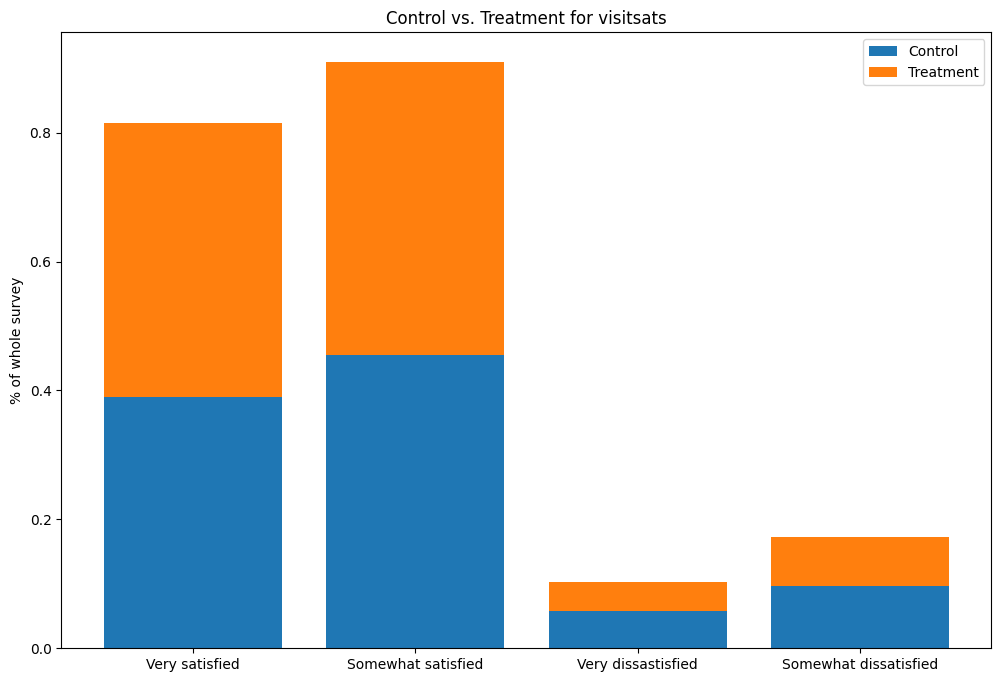

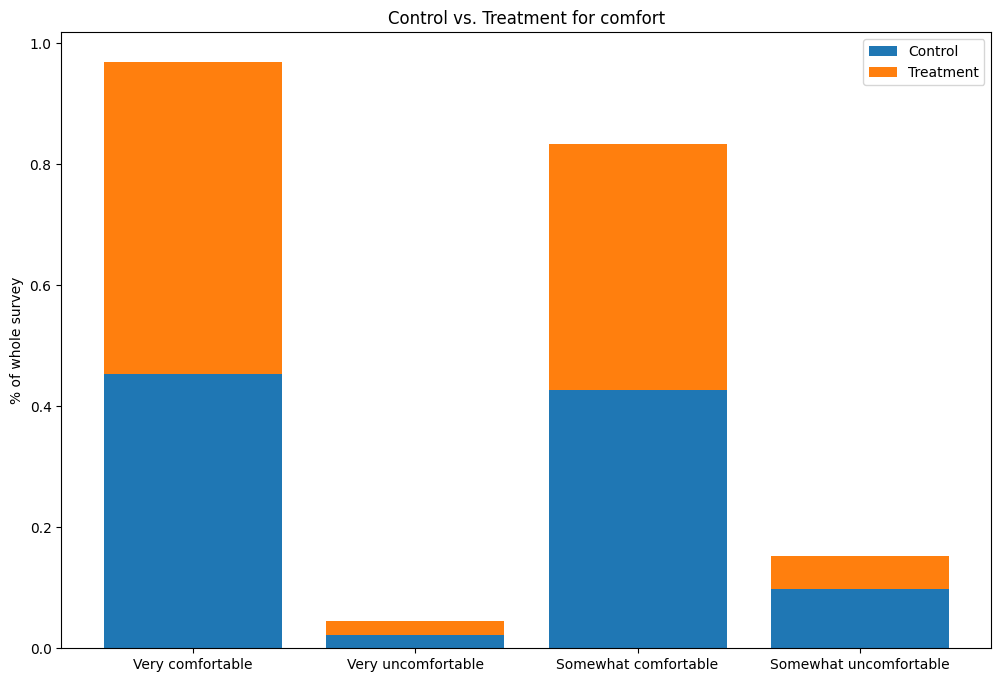

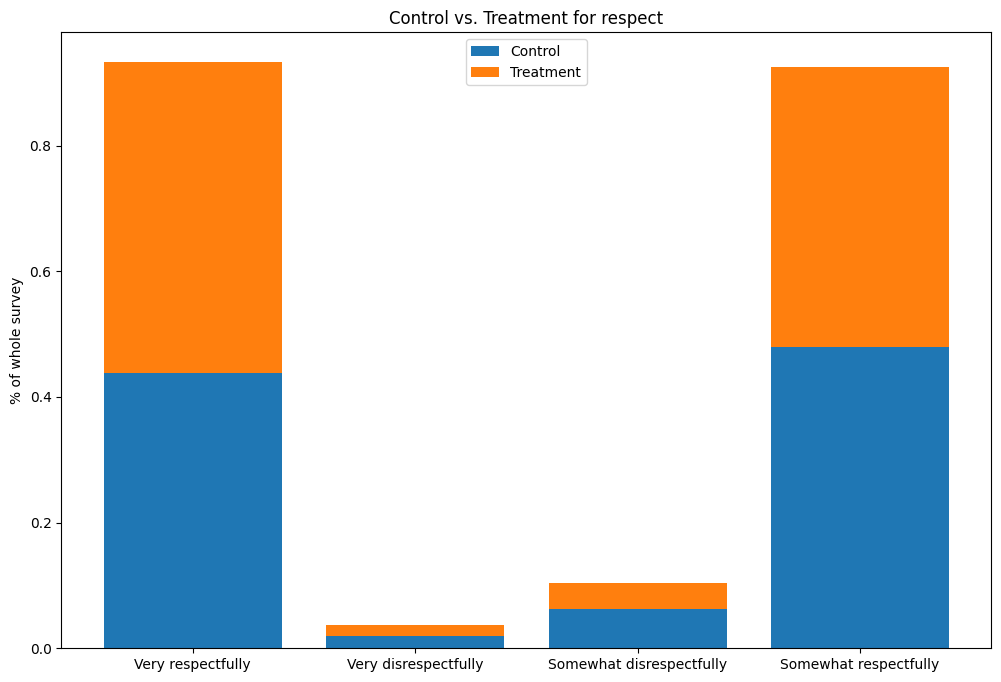

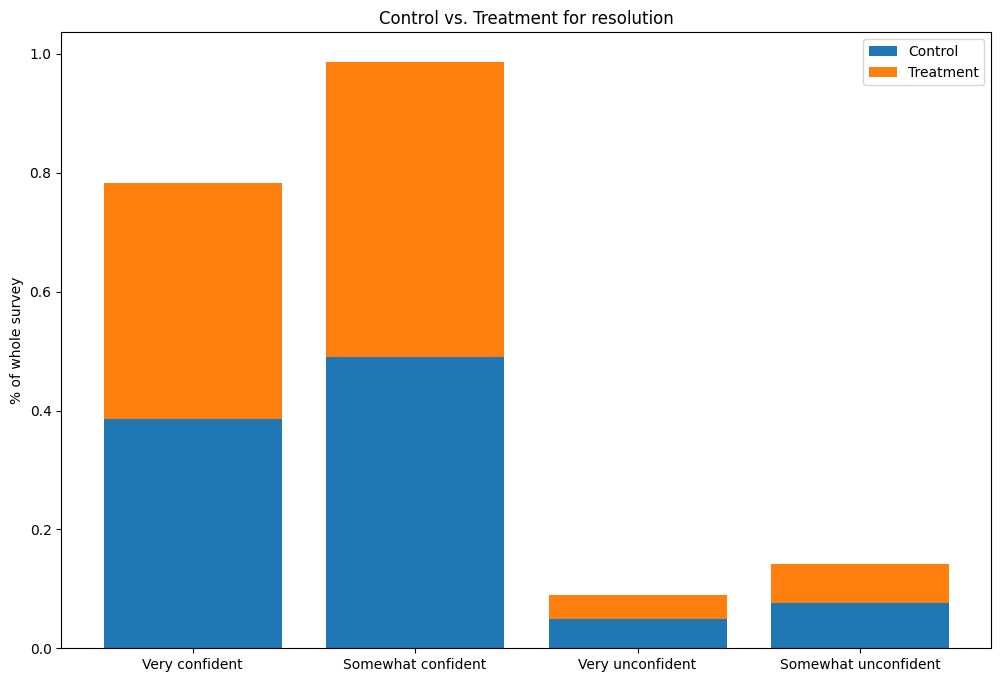

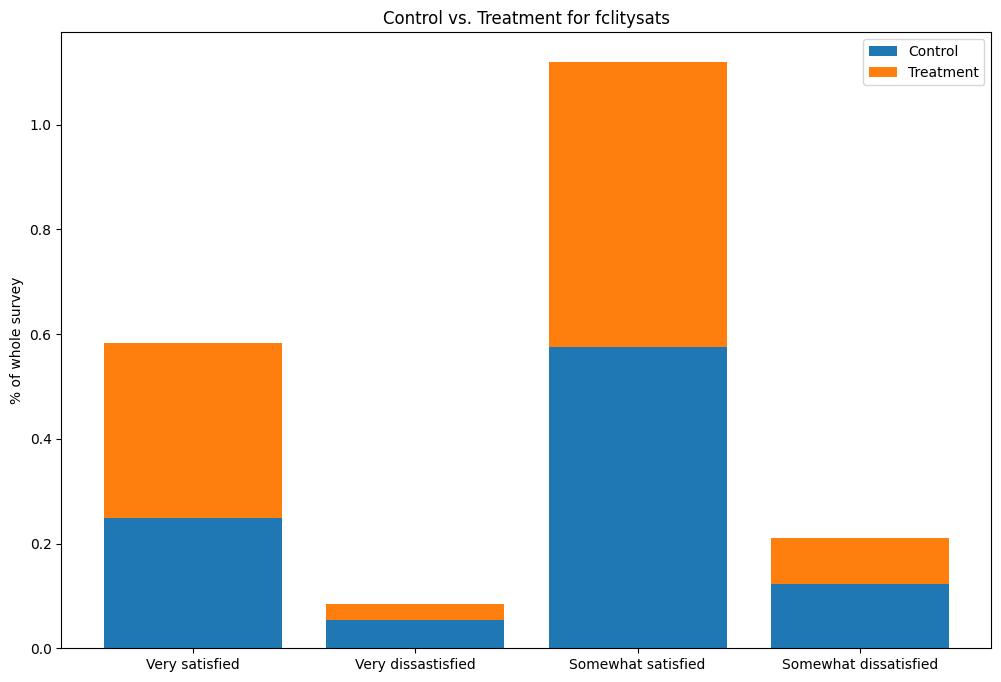

In [ ]:
ordinal = ['visitsats',	'comfort', 'respect', 'resolution', 'fclitysats']
for o in ordinal:
  values = user.groupby('treatment')[o].value_counts().unstack()
  values = (values.divide(values.sum(axis=1), axis=0).T) # get in percentage of whole for each group
  values['Difference'] = values['Treatment'] - values['Control']
  values = values.sort_values('Difference', ascending=False).reset_index()
  plt.figure(figsize=(12, 8))
  bars1 = plt.bar(values[o], values['Control'], label='Control')
  bars2 = plt.bar(values[o], values['Treatment'], bottom=values['Control'], label='Treatment')
  plt.ylabel('% of whole survey')
  plt.title(f'Control vs. Treatment for {o}')
  plt.legend()
  plt.show()

Final Product - Change to side by side and add data labels

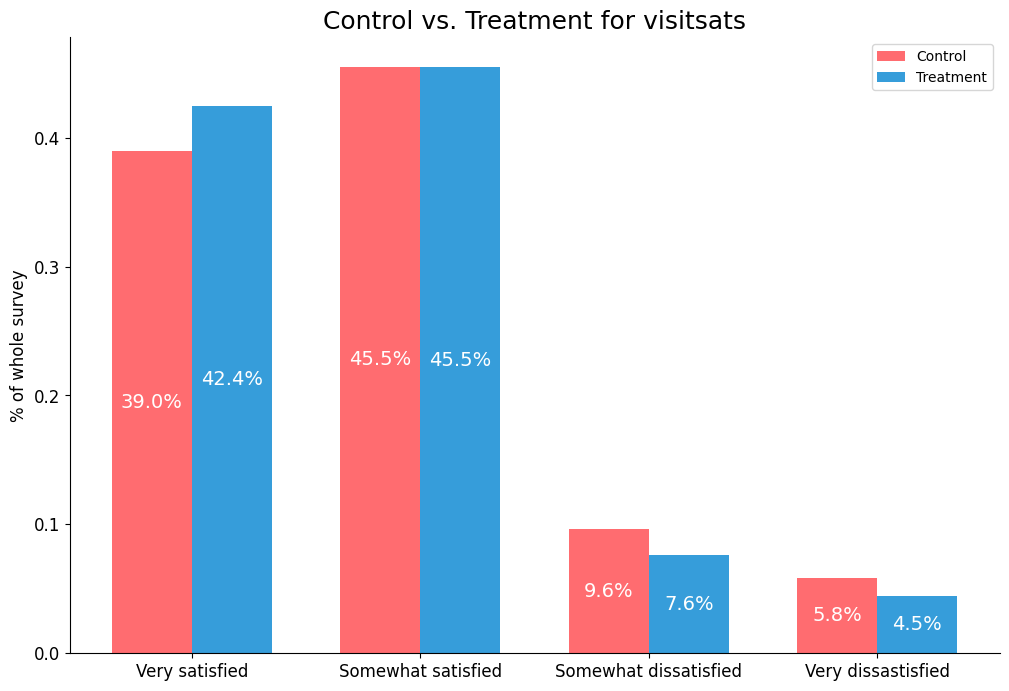

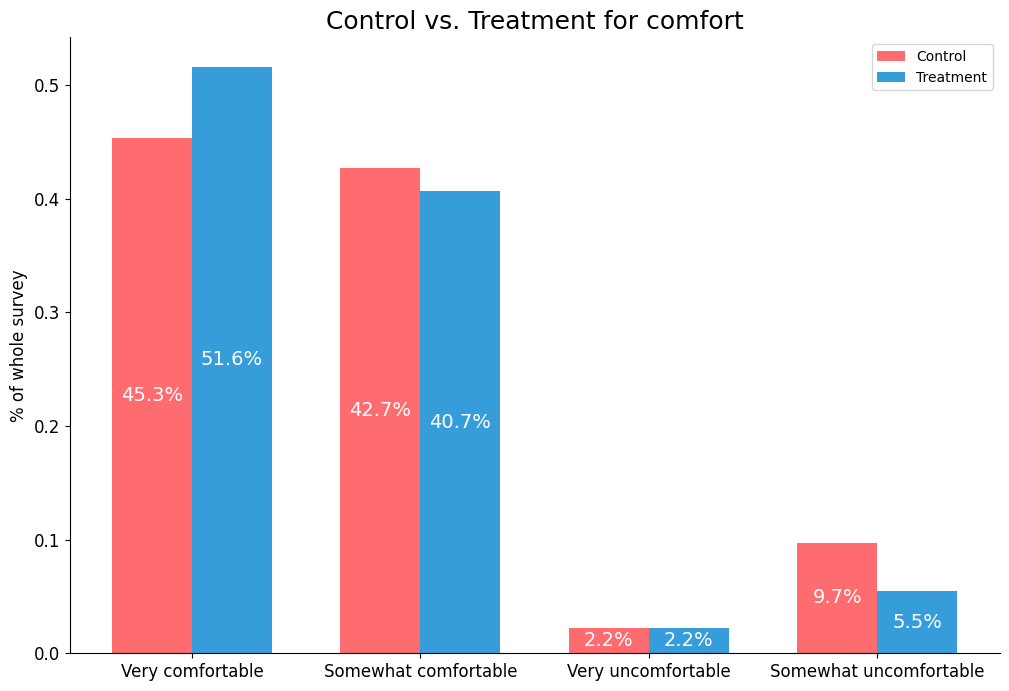

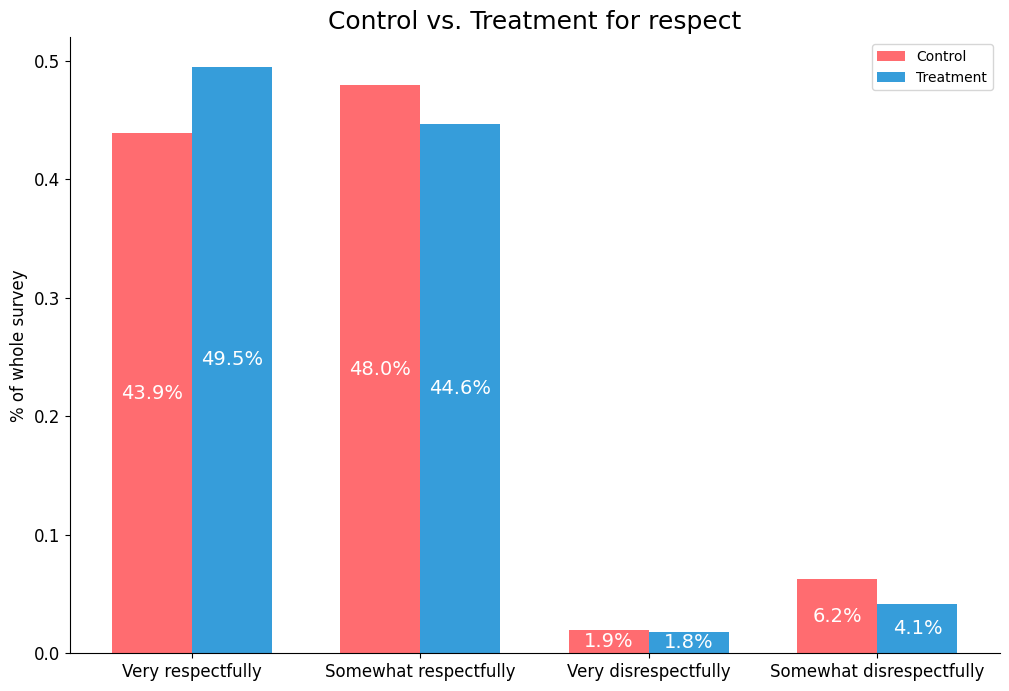

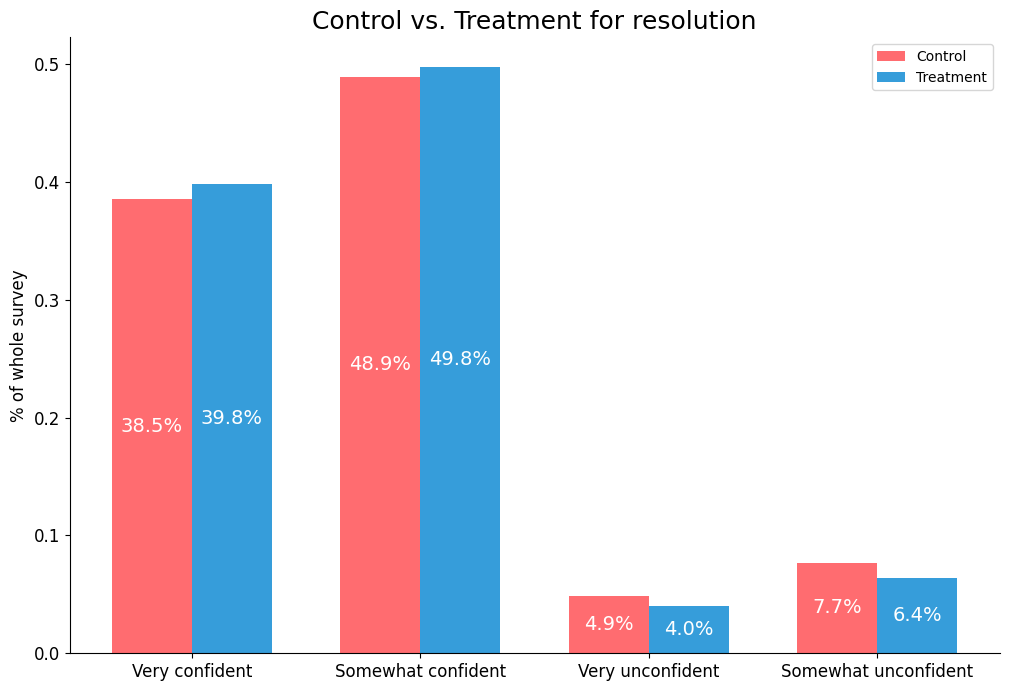

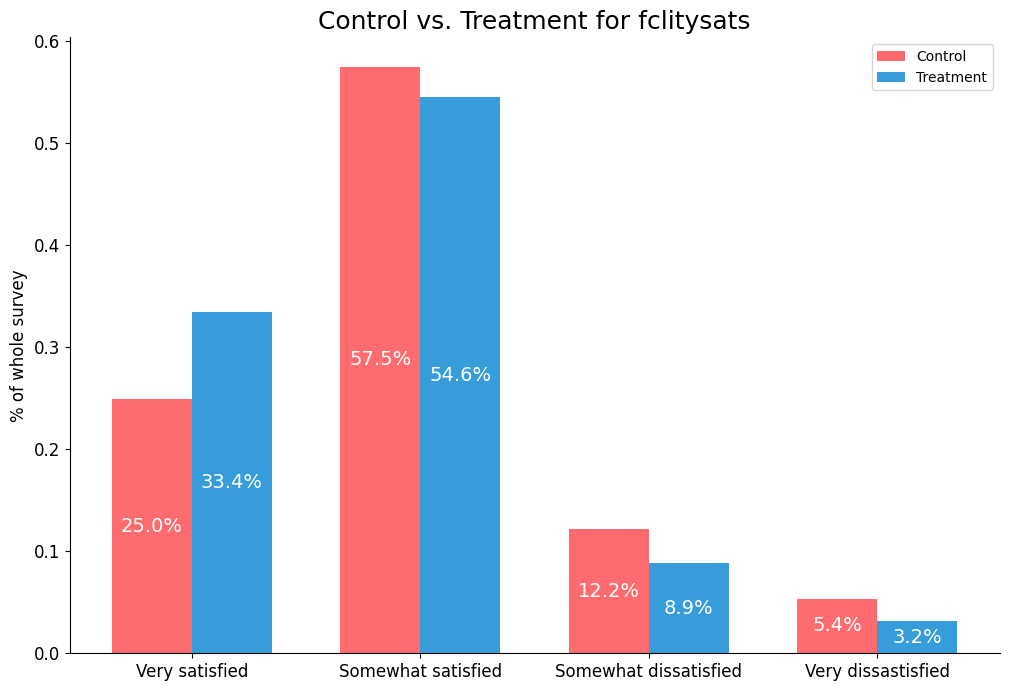

In [ ]:
ordinal = ['visitsats',	'comfort', 'respect', 'resolution', 'fclitysats']
for o in ordinal:
  values = user.groupby('treatment')[o].value_counts().unstack()
  values = (values.divide(values.sum(axis=1), axis=0).T).reset_index() # get in percentage of whole for each group
  values['Difference'] = values['Treatment'] - values['Control']
  values['fWord'] = values[o].str.split().str[0]
  values['lWord'] = values[o].str.split().str[1]
  values = values.sort_values(['lWord','fWord'], ascending=[True, False]).reset_index() if 's' not in values['lWord'][0] else values.sort_values(['lWord','fWord'], ascending=[False, False]).reset_index()
  plt.figure(figsize=(12, 8))
  bar_width = 0.35  # Width of each bar
  r1 = range(len(values))  # Position of Control bars
  r2 = [x + bar_width for x in r1]  # Position of Treatment bars

  # Plotting the bars for Control and Treatment groups
  bars1 = plt.bar(r1, values['Control'], width=bar_width, label='Control', color =colors[0], alpha=0.8)
  bars2 = plt.bar(r2, values['Treatment'], width=bar_width, label='Treatment', color = colors[1], alpha=0.8)

  # Adding data labels for 'Control' bars
  for bar in bars1:
      yval = bar.get_height()
      plt.text(
          bar.get_x() + bar.get_width() / 2, yval / 2,  # Center text vertically within the bar
          f'{yval * 100:.1f}%', ha='center', va='center', color='white', fontsize=14
      )

  # Adding data labels for 'Treatment' bars
  for bar in bars2:
      yval = bar.get_height()
      plt.text(
          bar.get_x() + bar.get_width() / 2, yval / 2,  # Center text vertically within the bar
          f'{yval * 100:.1f}%', ha='center', va='center', color='white', fontsize=14
      )
  plt.xticks([r + bar_width / 2 for r in range(len(values))], values[o], fontsize=12)
  plt.yticks(fontsize=12)
  plt.ylabel('% of whole survey', fontsize=12)
  plt.title(f'Control vs. Treatment for {o}', fontsize=18)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.legend()
  plt.savefig(f'/content/drive/MyDrive/Data - Human Centered DS/Plots/sideBySideBar{o}.png', bbox_inches='tight', dpi=400)
  plt.show()

Alternate solution

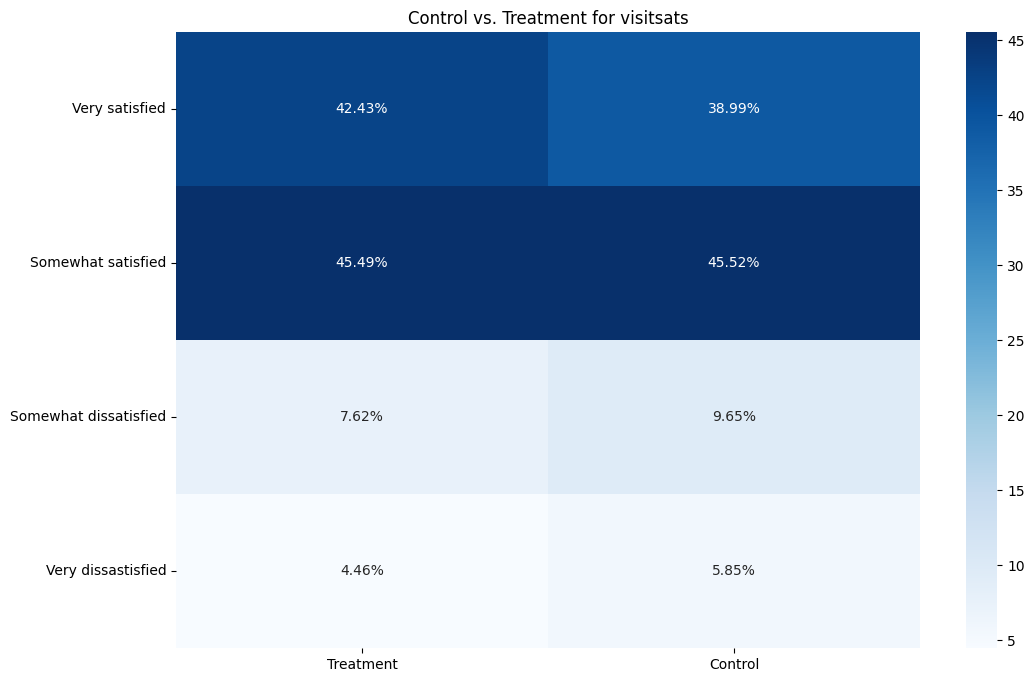

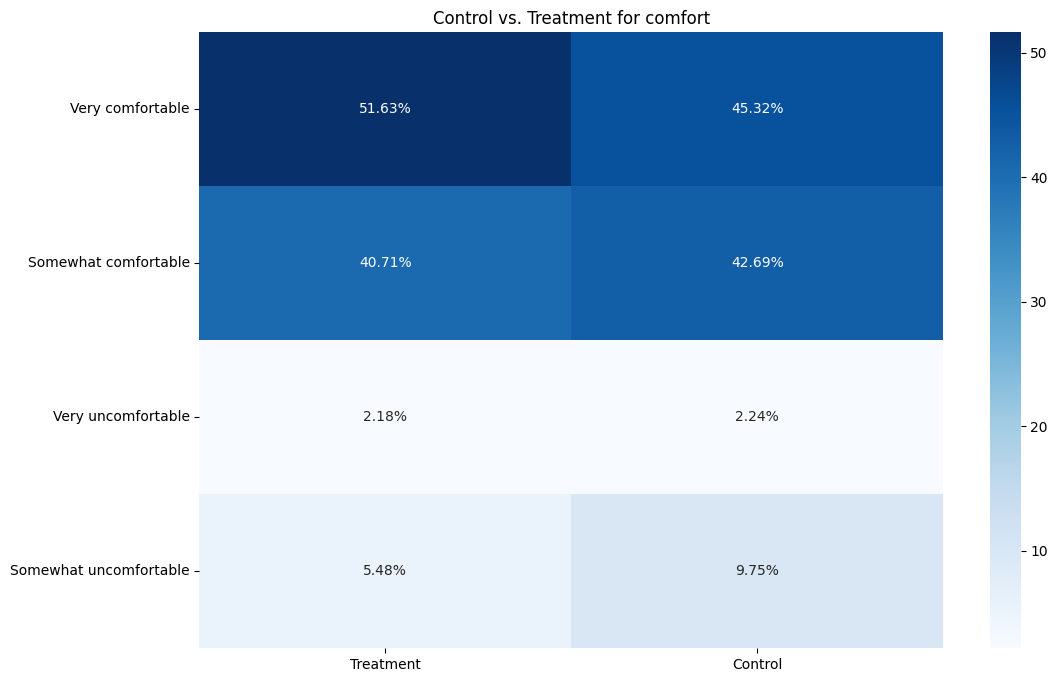

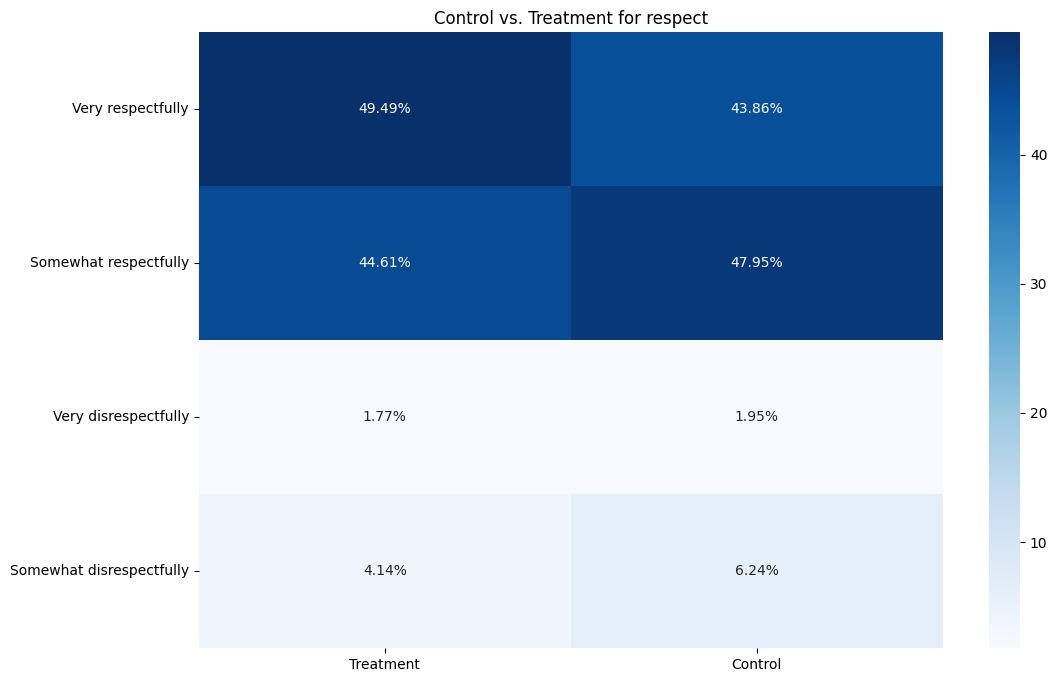

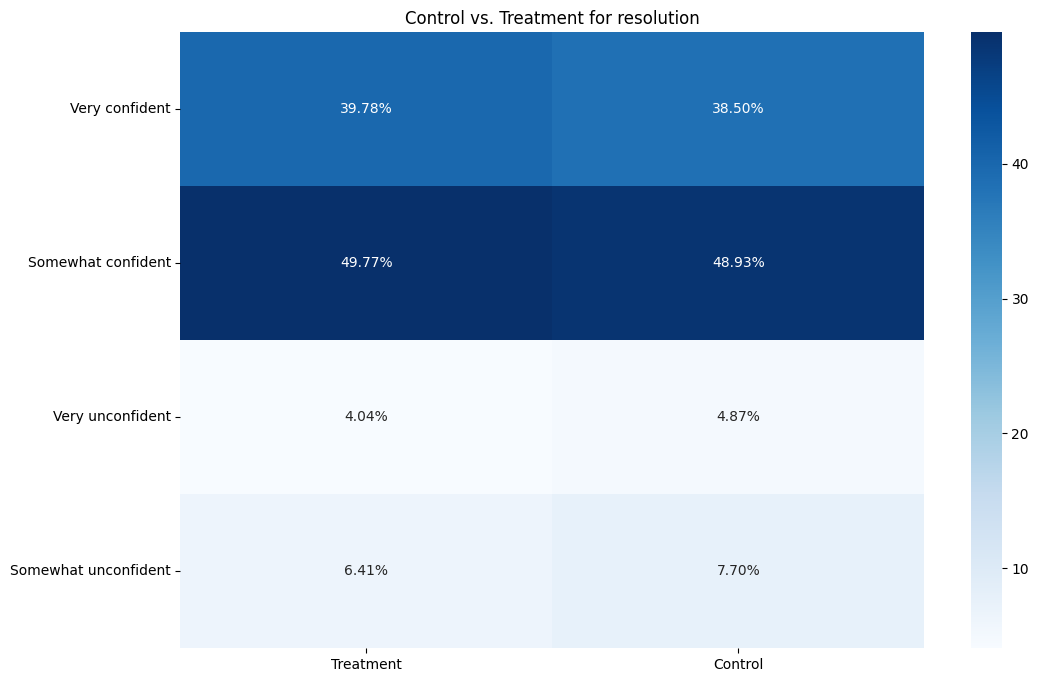

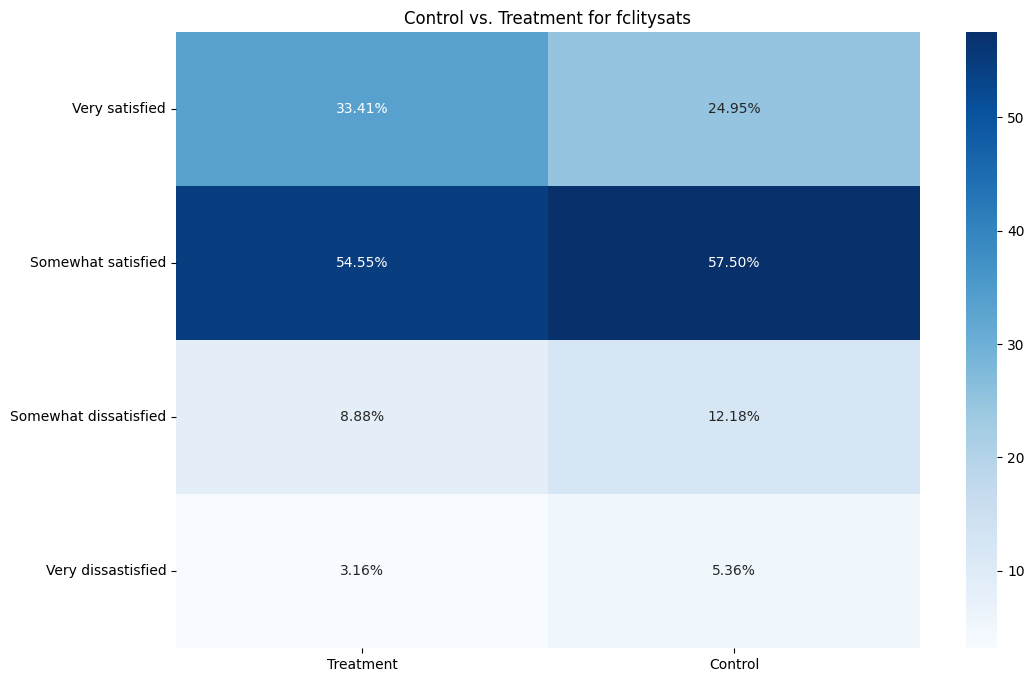

In [ ]:
ordinal = ['visitsats',	'comfort', 'respect', 'resolution', 'fclitysats']
for o in ordinal:
  values = user.groupby('treatment')[o].value_counts().unstack()
  values = (values.divide(values.sum(axis=1), axis=0).T).reset_index() # get in percentage of whole for each group
  values['Difference'] = values['Treatment'] - values['Control']
  values['fWord'] = values[o].str.split().str[0]
  values['lWord'] = values[o].str.split().str[1]
  values = values.sort_values(['lWord','fWord'], ascending=[True, False]).reset_index() if 's' not in values['lWord'][0] else values.sort_values(['lWord','fWord'], ascending=[False, False]).reset_index()
  plt.figure(figsize=(12, 8))
  ax = sns.heatmap(values[['Treatment', 'Control']]*100, annot=True, fmt=".2f", cmap='Blues', xticklabels=['Treatment', 'Control'], yticklabels=values[o])
  for text in ax.texts:
      text.set_text(text.get_text() + "%")
  plt.yticks(rotation=0)
  plt.xlabel(None)
  plt.title(f'Control vs. Treatment for {o}')
  plt.savefig(f'/content/drive/MyDrive/Data - Human Centered DS/Plots/Heatmaps_{o}.png', bbox_inches='tight', dpi=400)
  plt.show()

* These graphics present that there is generally a lot more positive feedback on these surveys, but they do trend upward after treatment (also the negative one's get lower). It does indicate that treatment has a consistent and positive impact on user satisfaction.
* The heatmap gives color context to this, but still mostly presents just numbers. The shading of color is not as visually clear as a bar chart. Bar charts help people see how large the differences are. The side by side bar allows people to clearly see that positive perceptions got higher and negative ones got lower along with showing how much positive percpetions outweigh negative one's from the start. The percentage data labels also help with making sure accurate data is presented and easily accessible. The sorting of the bars also helps to show how positive perceptions are much larger than the negative ones overall. I also like dropping unecessary lines on the outside. The boxed in graph distracts me more than the just x and y axis on a graph.

#### Citizen

In [ ]:
citizen = Q3_dic['Citizen']

In [ ]:
citizen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uid                     3294 non-null   int64  
 1   b_visit                 3294 non-null   float64
 2   b_pol_handling          3294 non-null   float64
 3   b_safety                3294 non-null   float64
 4   e_urja_knowledge        3294 non-null   object 
 5   e_visit                 3294 non-null   float64
 6   e_pol_handling          3294 non-null   float64
 7   e_safety                3294 non-null   float64
 8   spw                     3294 non-null   float64
 9   e_gender                3294 non-null   object 
 10  hh_id                   3294 non-null   float64
 11  member_gender           3294 non-null   object 
 12  ps_code                 3294 non-null   float64
 13  population              3294 non-null   int64  
 14  urban                   3294 non-null   

In [ ]:
citizen['e_pol_handling'].describe()

,e_pol_handling
count,3294.000000
mean,0.535941
std,0.449314
min,-1.000000
25%,0.250000
50%,0.600000
75%,1.000000
max,1.000000


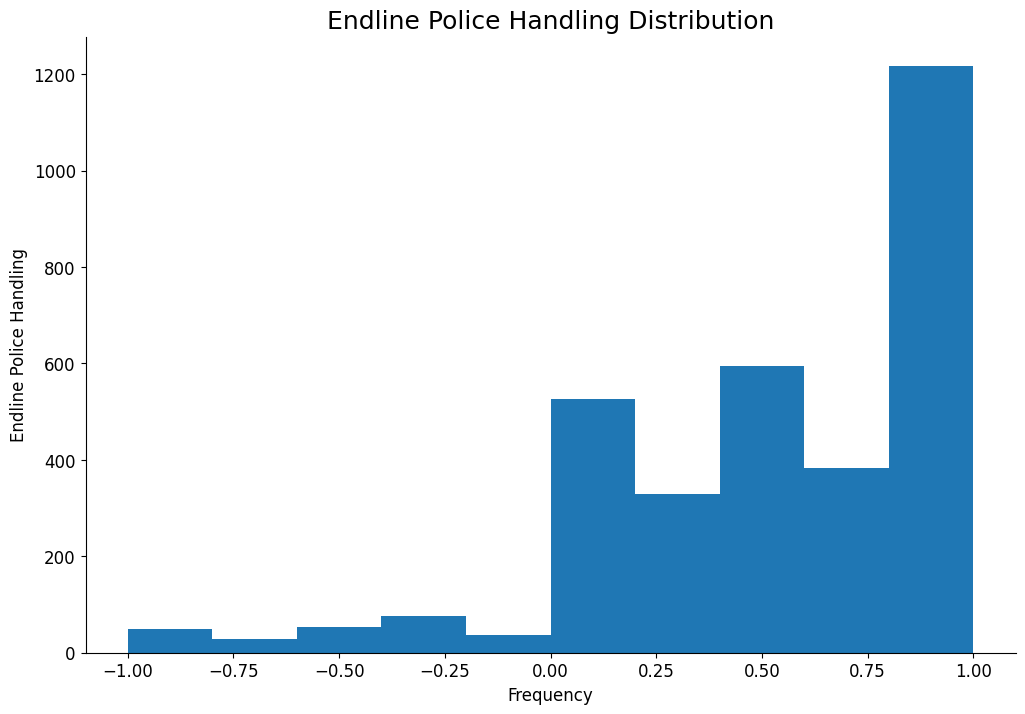

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(citizen['e_pol_handling'])
plt.xlabel('Frequency', fontsize = 12)
plt.ylabel('Endline Police Handling', fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Endline Police Handling Distribution', fontsize = 18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig(f'/content/drive/MyDrive/Data - Human Centered DS/Plots/hist_citizen.png', bbox_inches='tight', dpi=400)
plt.show()

## Question 4

### Data

In [ ]:
for key, value in Q4_dic.items():
  print(key)
  try:
    display(value.head())
    value.info()
  except:
    display(value)

folder


'Question_4'

Admin


,month,fir_overall_count,fir_caw_count,fir_bywomen_count,arrest_count,dir_count,ncr_count,dial100_count,ps_code,population,...,dist_urban,strat_pca,treatment,group,dist_id,implement_quality,training_score,comm_outreach_strength,regular_whd,women_whd
0,2019-06-01,35,8,5,20,0,100,40.0,1001.0,129345,...,1,-0.234041,Treatment,women officers,1000,9.0,2.916667,2.2,0,1
1,2019-11-01,29,10,4,10,1,0,35.0,1001.0,129345,...,1,-0.234041,Treatment,women officers,1000,9.0,2.916667,2.2,0,1
2,2018-10-01,26,8,3,12,0,72,25.0,1001.0,129345,...,1,-0.234041,Treatment,women officers,1000,9.0,2.916667,2.2,0,1
3,2018-11-01,27,8,4,12,0,64,41.0,1001.0,129345,...,1,-0.234041,Treatment,women officers,1000,9.0,2.916667,2.2,0,1
4,2020-05-01,32,6,4,10,0,22,55.0,1001.0,129345,...,1,-0.234041,Treatment,women officers,1000,9.0,2.916667,2.2,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   month                   4500 non-null   object 
 1   fir_overall_count       4500 non-null   int64  
 2   fir_caw_count           4500 non-null   int64  
 3   fir_bywomen_count       4500 non-null   int64  
 4   arrest_count            4500 non-null   int64  
 5   dir_count               4500 non-null   int64  
 6   ncr_count               4500 non-null   int64  
 7   dial100_count           4500 non-null   float64
 8   ps_code                 4500 non-null   float64
 9   population              4500 non-null   int64  
 10  urban                   4500 non-null   object 
 11  dist_urban              4500 non-null   int64  
 12  strat_pca               4500 non-null   float64
 13  treatment               4500 non-null   object 
 14  group                   4500 non-null   

,Unnamed: 0,ps_code,urban,dist_urban,strat_pca,treatment,group,dist_id,training_score,regular_whd,...,b_total_surveyed,b_female_surveyed,b_male_surveyed,population,implement_quality,comm_outreach_strength,e_male_weight,b_male_weight,e_female_weight,b_female_weight
0,0,1001.0,Rural,1,-0.234041,Treatment,women officers,1000,2.916667,0,...,10,0,10,129345,9,2.200000,3.818182,3.272727,6.000000,3.000000
1,1,1002.0,Rural,1,-0.960574,Control,control,1000,1.545454,0,...,11,0,11,170000,7,1.798067,2.454546,1.727273,0.000000,1.000000
2,2,1003.0,Rural,1,1.042663,Control,control,1000,1.090909,0,...,11,2,9,102467,7,1.798067,7.300000,4.900000,3.000000,3.500000
3,3,1004.0,Rural,1,-1.590761,Treatment,regular mhd,1000,3.897297,1,...,13,3,10,54000,7,2.030000,3.000000,1.800000,1.000000,1.333333
4,4,1005.0,Rural,1,-1.570695,Treatment,women officers,1000,4.157658,0,...,12,2,10,76376,9,2.200000,2.777778,2.500000,2.333333,1.500000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3416 entries, 0 to 3415
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3416 non-null   int64  
 1   ps_code                 3416 non-null   float64
 2   urban                   3416 non-null   object 
 3   dist_urban              3416 non-null   int64  
 4   strat_pca               3416 non-null   float64
 5   treatment               3416 non-null   object 
 6   group                   3416 non-null   object 
 7   dist_id                 3416 non-null   int64  
 8   training_score          3416 non-null   float64
 9   regular_whd             3416 non-null   int64  
 10  women_whd               3416 non-null   int64  
 11  dayofweek               3416 non-null   object 
 12  timeofday               3416 non-null   object 
 13  eavg_all                3416 non-null   float64
 14  eavg_women              3416 non-null   

,rand_index,total_assigned_officers,total_fir_2017,population,urban,dist_urban,strat_pca,treatment,group,dist_id,implement_quality,training_score,comm_outreach_strength,regular_whd,women_whd
0,0,47,412,129345,Rural,1,-0.234041,Treatment,women officers,1000,9.000000,2.916667,2.200000,0,1
1,1,29,218,170000,Rural,1,-0.960574,Control,control,1000,7.462185,1.545454,1.798067,0,0
2,2,75,694,102467,Rural,1,1.042663,Control,control,1000,7.462185,1.090909,1.798067,0,0
3,3,40,144,54000,Rural,1,-1.590761,Treatment,regular mhd,1000,7.000000,3.897297,2.030000,1,0
4,4,37,130,76376,Rural,1,-1.570695,Treatment,women officers,1000,9.000000,4.157658,2.200000,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rand_index               180 non-null    int64  
 1   total_assigned_officers  180 non-null    int64  
 2   total_fir_2017           180 non-null    int64  
 3   population               180 non-null    int64  
 4   urban                    180 non-null    object 
 5   dist_urban               180 non-null    int64  
 6   strat_pca                180 non-null    float64
 7   treatment                180 non-null    object 
 8   group                    180 non-null    object 
 9   dist_id                  180 non-null    int64  
 10  implement_quality        180 non-null    float64
 11  training_score           180 non-null    float64
 12  comm_outreach_strength   180 non-null    float64
 13  regular_whd              180 non-null    int64  
 14  women_whd                1

### Visualizations

#### Random

In [ ]:
rand = Q4_dic['Random']

<Figure size 1200x800 with 0 Axes>

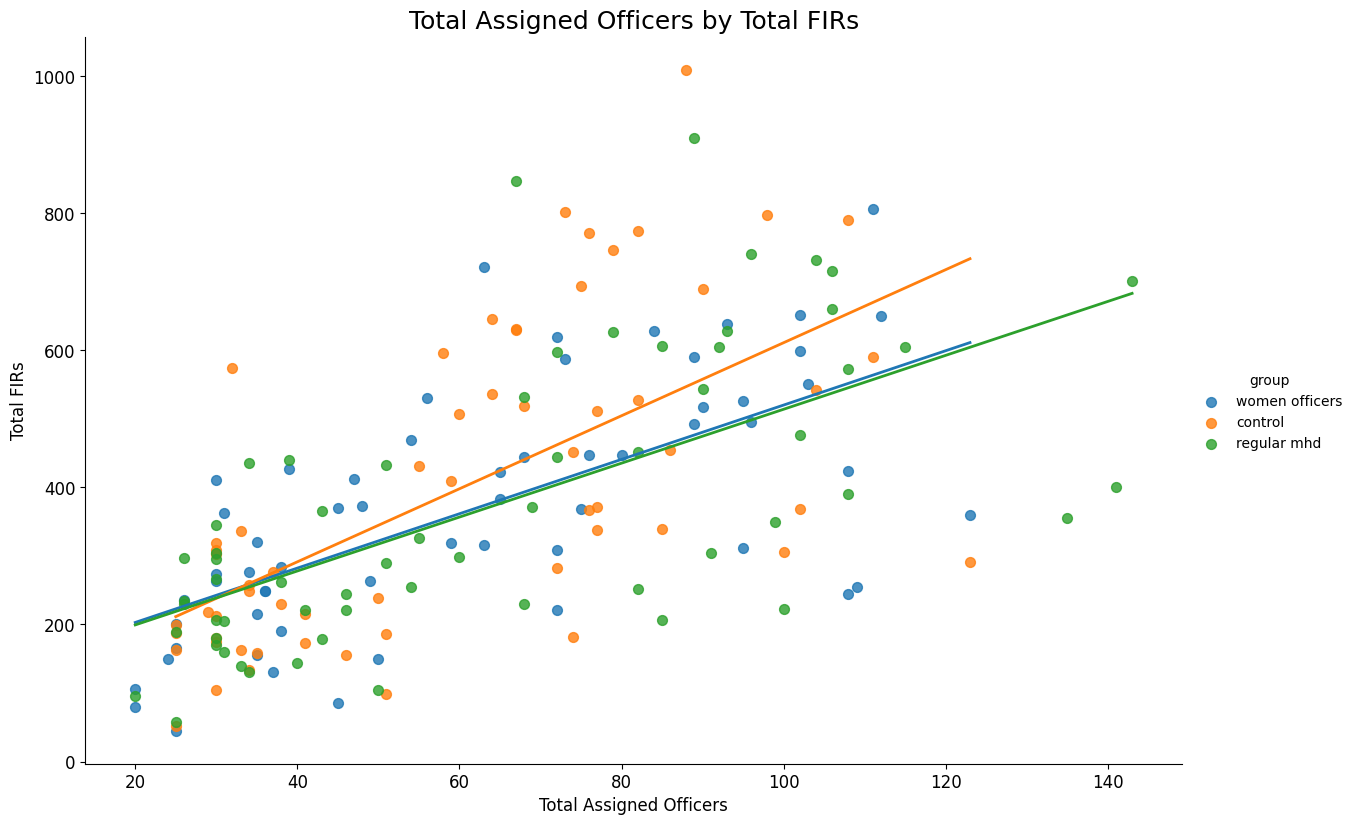

In [ ]:
plt.figure(figsize=(12, 8))
sns.lmplot(
    data=rand,
    x='total_assigned_officers',
    y='total_fir_2017',
    hue='group',
    height=8,
    aspect=1.5,
    scatter_kws={'s': 50},
    line_kws={'linewidth': 2}, #Line of best fit
    ci=None,
)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Total Assigned Officers', fontsize=12)
plt.ylabel('Total FIRs', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Total Assigned Officers by Total FIRs', fontsize=18)
plt.savefig(f'/content/drive/MyDrive/Data - Human Centered DS/Plots/officersbyfirsScatter.png', bbox_inches='tight', dpi=400)
plt.show()

The groups do not alter the numbers of firs significantly. The number of officers do, but that makes sense. More officers are present in areas with more people.

#### CCTV

In [ ]:
mostRelavent = ['bavg_women', 'eavg_women', 'bavg_all', 'eavg_all', 'bavg_wprop', 'eavg_wprop', 'b_female_officers', 'e_female_officers']
CCTV = Q4_dic['CCTVwFemaleStaff']

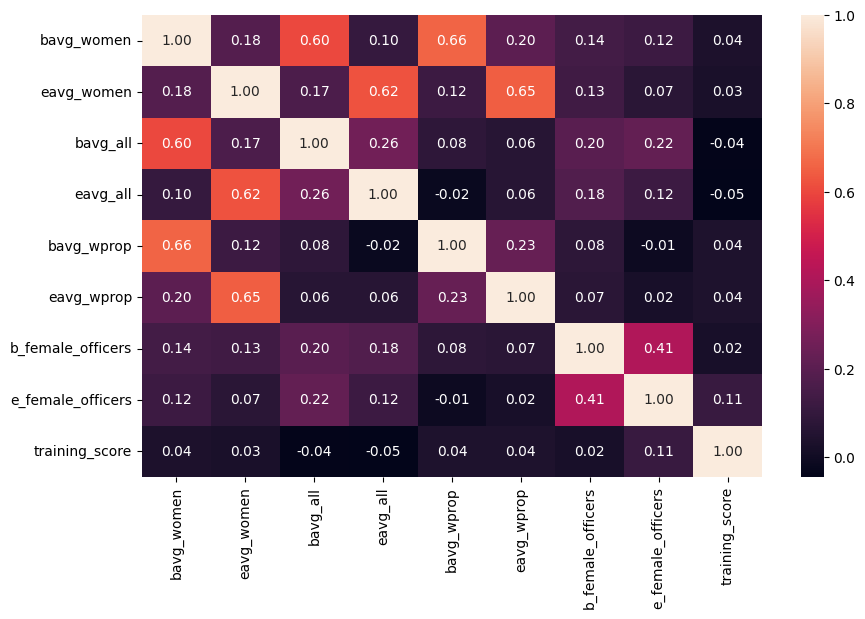

In [ ]:
corrCols = mostRelavent + ['training_score']
plt.figure(figsize=(10, 6))
correlations = CCTV[corrCols].corr()
_ = sns.heatmap(correlations, annot=True, fmt='.2f')

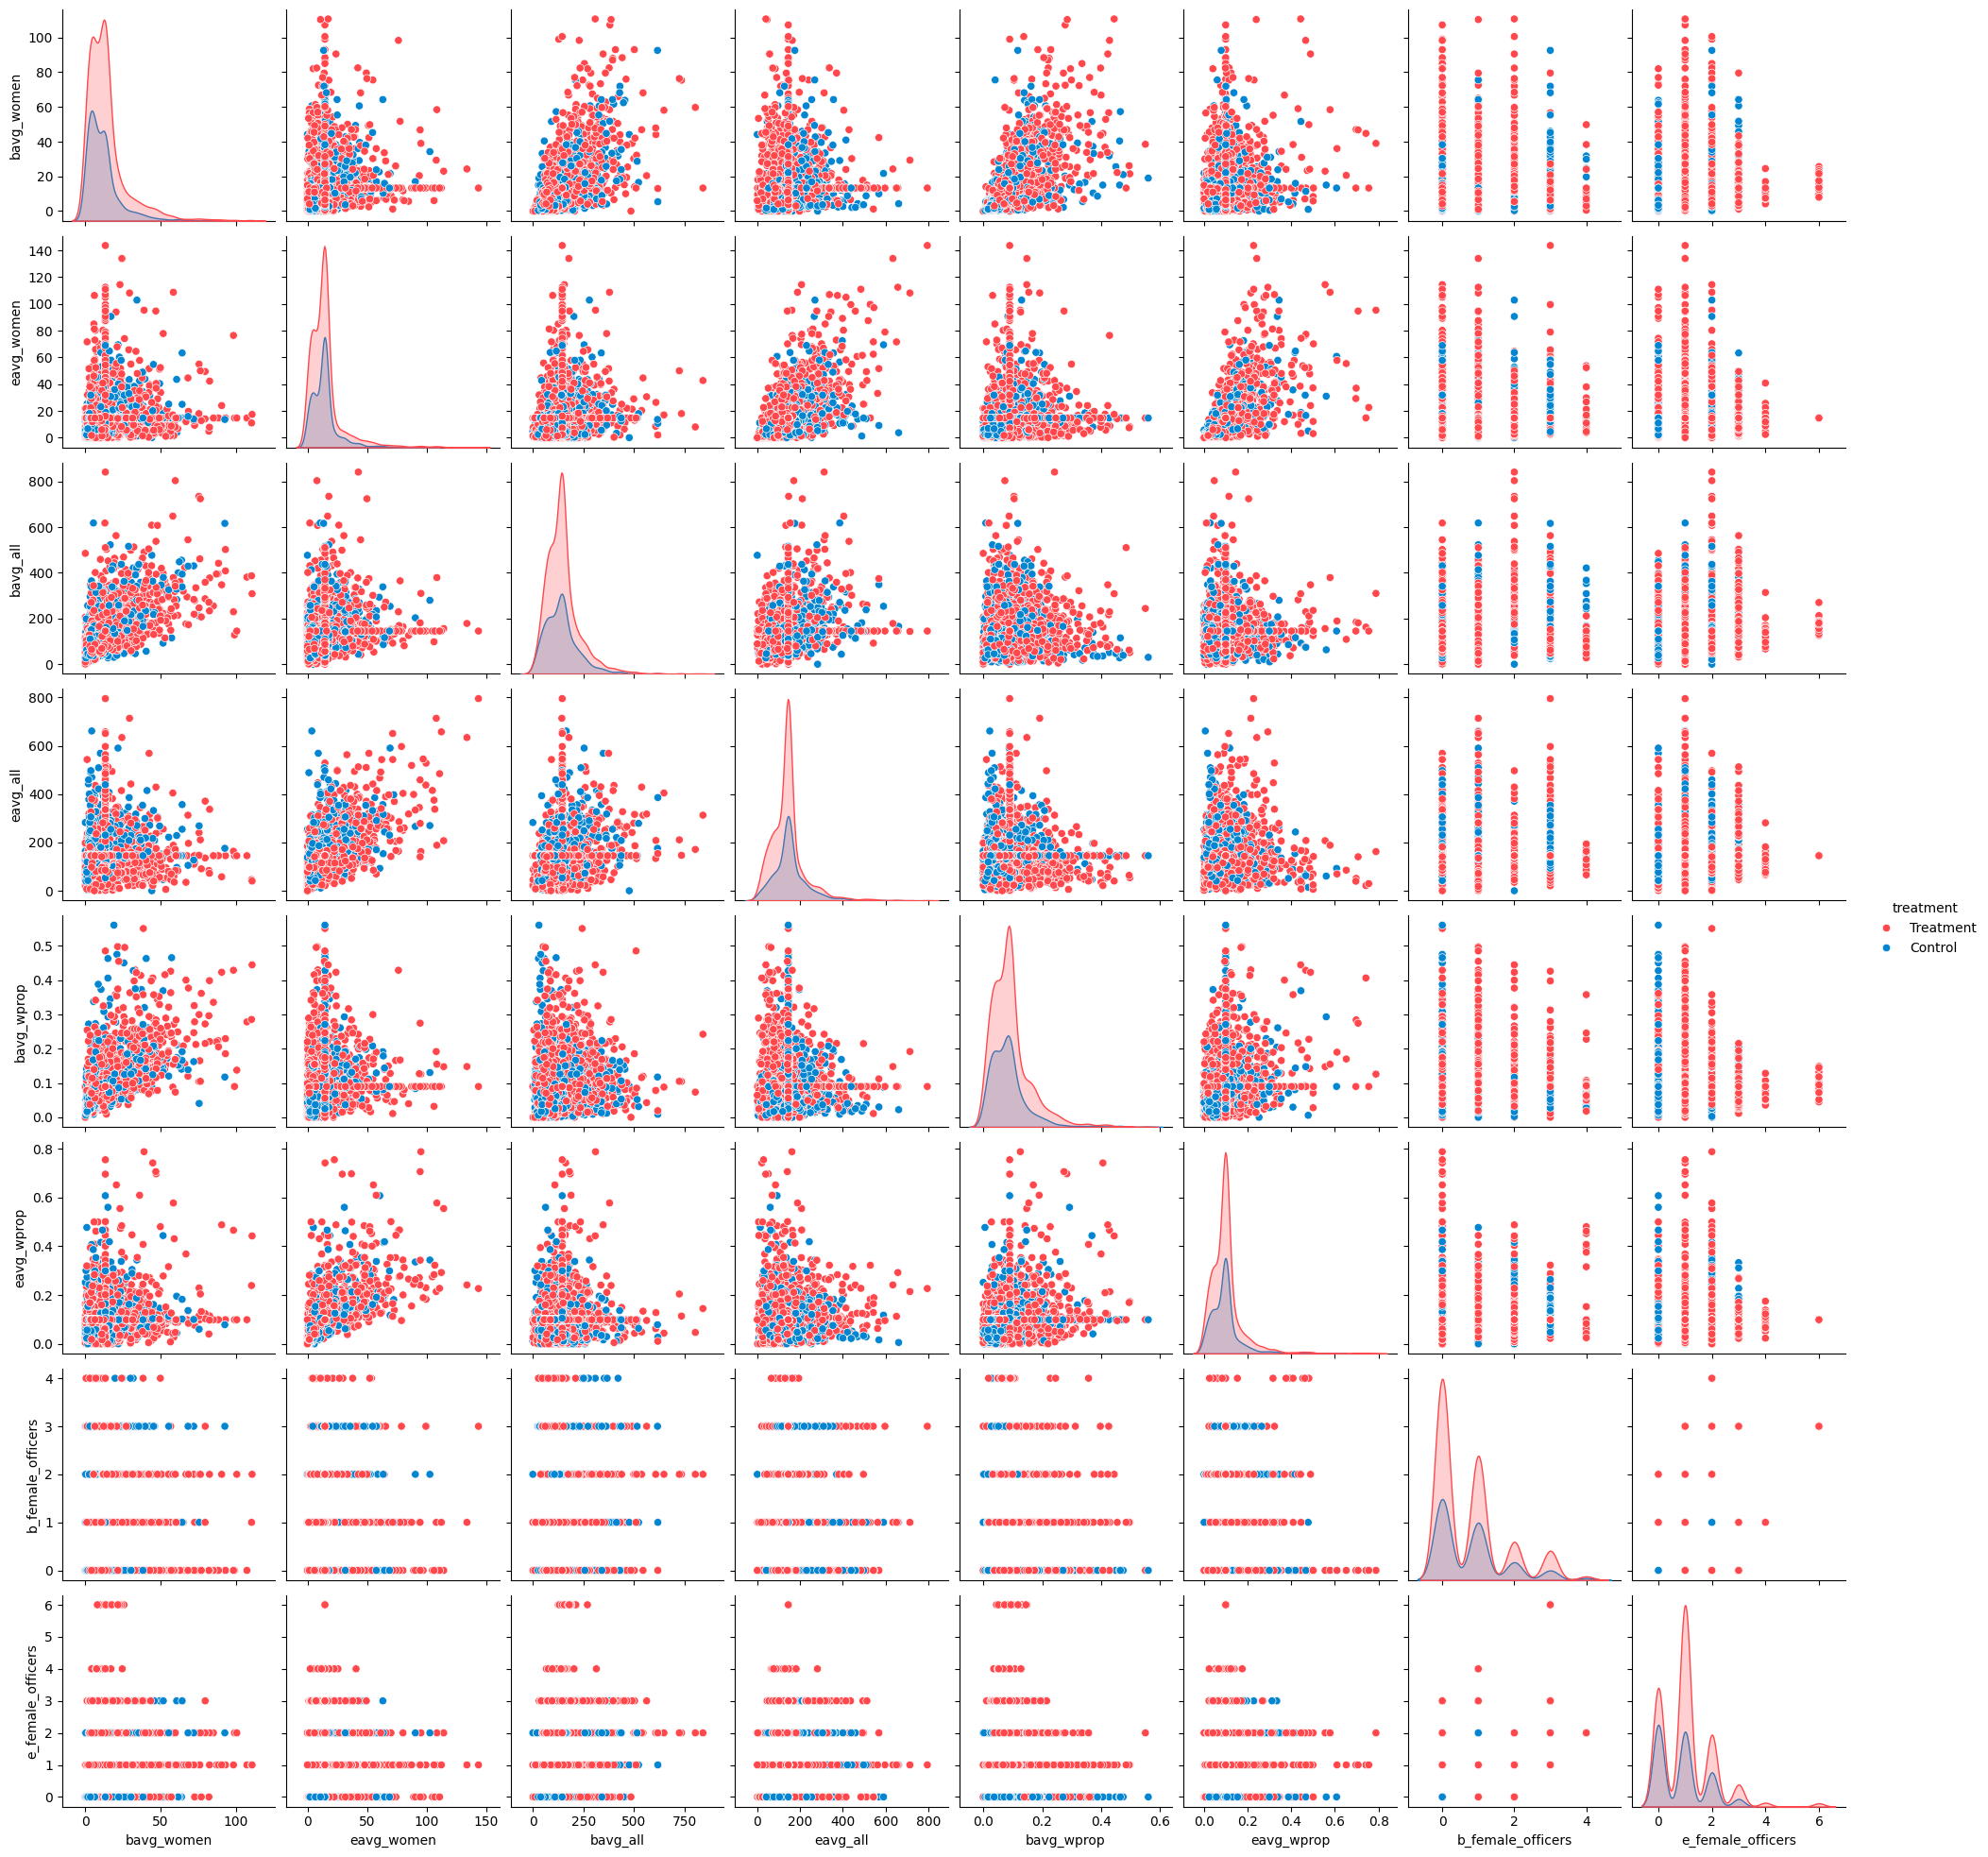

In [ ]:
pairPlt = mostRelavent + ['treatment']
pairplot_figure = sns.pairplot(data=CCTV[pairPlt], hue='treatment', palette=colors)
_ = plt.show()

In [ ]:
CCTVAgg = CCTV.groupby(['e_female_officers', 'treatment'])['eavg_women'].mean().reset_index()

In [ ]:
CCTVAgg

,e_female_officers,treatment,eavg_women
0,0,Control,12.634163
1,0,Treatment,13.293615
2,1,Control,12.785875
3,1,Treatment,16.093608
4,2,Control,17.674406
5,2,Treatment,15.179225
6,3,Control,24.409784
7,3,Treatment,14.159219
8,4,Treatment,13.526102
9,6,Treatment,14.689332


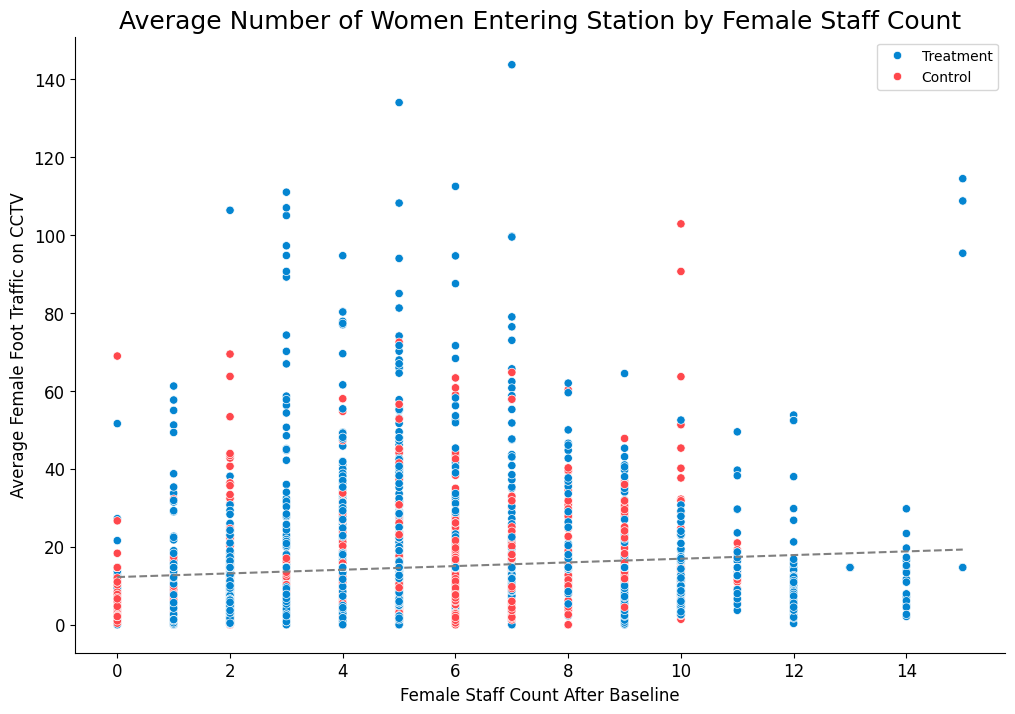

In [ ]:
plt.figure(figsize=(12, 8))
colors1 = [colors[1], colors[0]]
sns.scatterplot(data=CCTV, x='e_female_staff', y='eavg_women', hue='treatment', palette=colors1)
sns.regplot(data=CCTV, x='e_female_staff', y='eavg_women', scatter=False, color="gray", ci=None, line_kws={"linestyle": "dashed", "linewidth": 1.5})
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Average Number of Women Entering Station by Female Staff Count', fontsize=18)
plt.xlabel('Female Staff Count After Baseline', fontsize=12)
plt.ylabel('Average Female Foot Traffic on CCTV', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.savefig(f'/content/drive/MyDrive/Data - Human Centered DS/Plots/officersbyeavgwomenScatter.png', bbox_inches='tight', dpi=400)
plt.show()

In [ ]:
#user.groupby('treatment')[o].value_counts().unstack().T.reset_index()
CCTVAgg = CCTV.groupby(['treatment', 'e_female_officers'])['eavg_women'].mean().unstack().T.reset_index()
CCTVAgg = CCTVAgg.fillna(0).reset_index()

In [ ]:
table = CCTV.groupby(['e_female_officers'])['e_total_officers'].mean().reset_index()
table['avg_female_officers%'] = ((table['e_female_officers']/table['e_total_officers']).round(2)*100)
table#.to_csv('/content/table.csv', index=False)

,e_female_officers,e_total_officers,avg_female_officers%
0,0,7.447559,0.0
1,1,10.483257,10.0
2,2,11.791453,17.0
3,3,14.914110,20.0
4,4,13.000000,31.0
5,6,23.000000,26.0


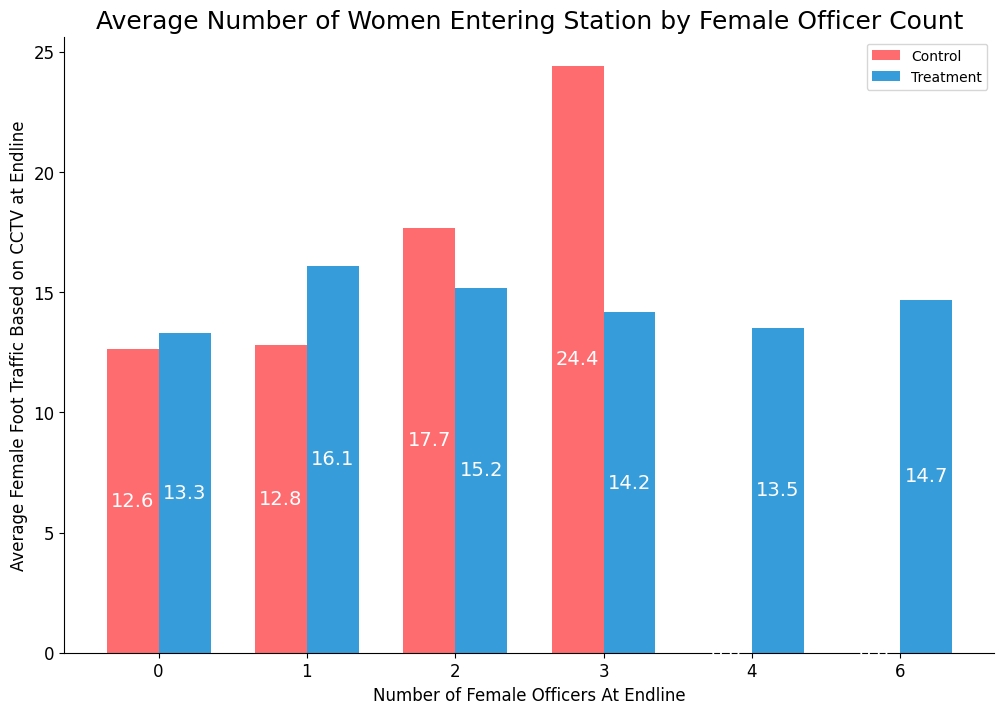

In [ ]:
plt.figure(figsize=(12, 8))
bar_width = 0.35  # Width of each bar
r1 = range(len(CCTVAgg))  # Position of Control bars
r2 = [x + bar_width for x in r1]  # Position of Treatment bars

# Plotting the bars for Control and Treatment groups
bars1 = plt.bar(r1, CCTVAgg['Control'], width=bar_width, label='Control', color =colors[0], alpha=0.8)
bars2 = plt.bar(r2, CCTVAgg['Treatment'], width=bar_width, label='Treatment', color = colors[1], alpha=0.8)

# Adding data labels for 'Control' bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, yval / 2,  # Center text vertically within the bar
        f'{yval * 1:.1f}', ha='center', va='center', color='white', fontsize=14
    )

# Adding data labels for 'Treatment' bars
for bar in bars2:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, yval / 2,  # Center text vertically within the bar
        f'{yval * 1:.1f}', ha='center', va='center', color='white', fontsize=14
    )
plt.yticks(fontsize=12)
plt.xticks([r + bar_width / 2 for r in range(len(CCTVAgg))], CCTVAgg['e_female_officers'], fontsize=12)
plt.xlabel('Number of Female Officers At Endline', fontsize=12)
plt.ylabel('Average Female Foot Traffic Based on CCTV at Endline', fontsize=12)
plt.title('Average Number of Women Entering Station by Female Officer Count', fontsize=18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.savefig(f'/content/drive/MyDrive/Data - Human Centered DS/Plots/sideBySideBarFemaleOfficer.png', bbox_inches='tight', dpi=400)
plt.show()

Main visualization for this dataset. No positive relationship between number of female officers and amount of women going in and out of the stations on average.